<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#text processing stage.
#start_time = time.clock()
from tqdm import tqdm
for index, row in tqdm(data_text.iterrows()):
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
#print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

1109it [01:49,  9.76it/s]

there is no text description for id: 1109


1276it [02:07,  9.79it/s]

there is no text description for id: 1277


1407it [02:21, 11.44it/s]

there is no text description for id: 1407


1639it [02:46,  9.18it/s]

there is no text description for id: 1639


2755it [04:40,  6.15it/s]

there is no text description for id: 2755


3321it [05:38,  9.82it/s]


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [10]:
result["feature_engineered"]= result['Gene'] +' '+result['Variation']
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
result.feature_engineered = result.feature_engineered.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [11]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

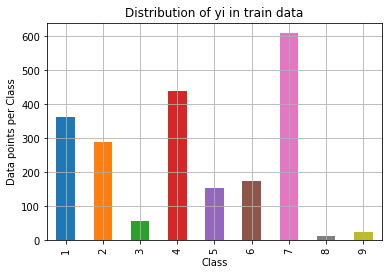

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


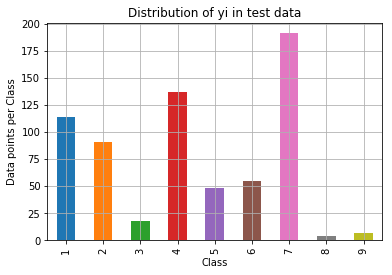

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


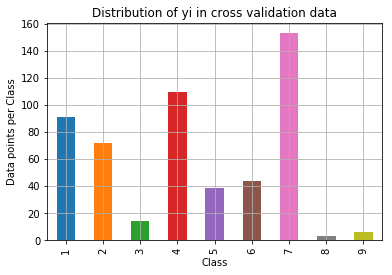

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [12]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


### Observation
    1. We made sure that data is distributed equally using stratified sampling

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.424047632036455
Log loss on Test Data using Random Model 2.4673370033341353
-------------------- Confusion matrix --------------------


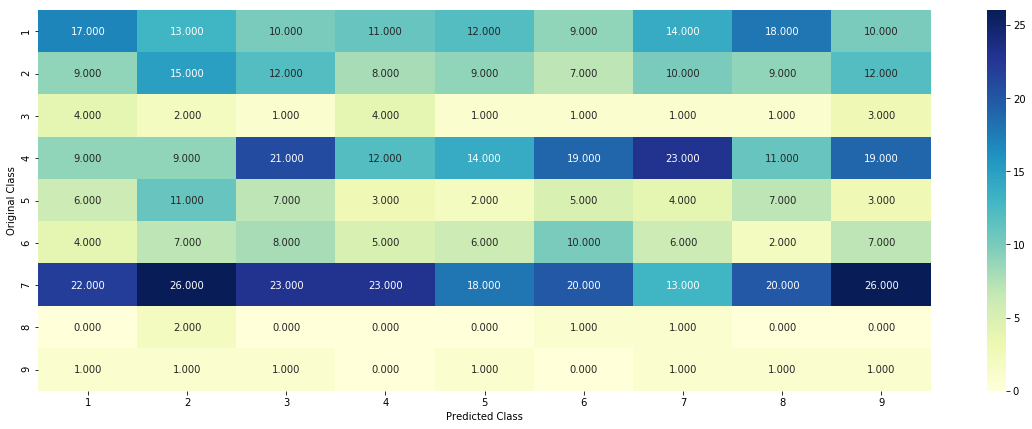

-------------------- Precision matrix (Columm Sum=1) --------------------


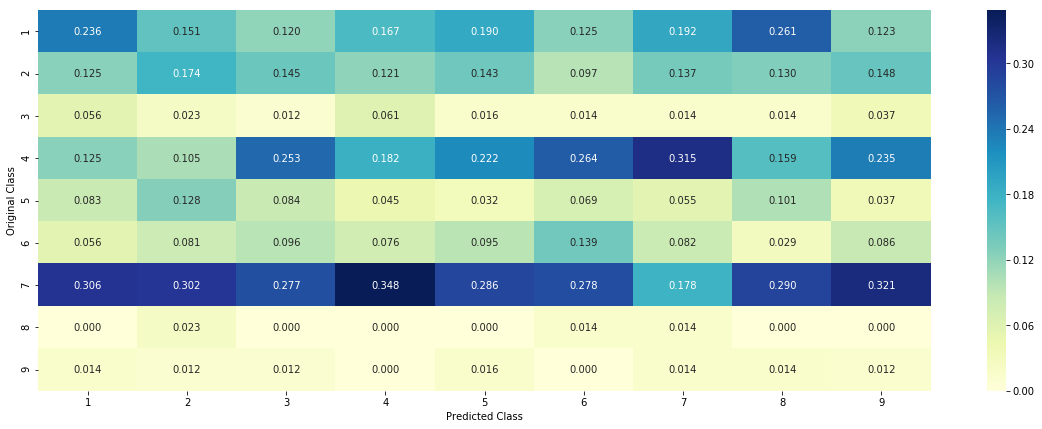

-------------------- Recall matrix (Row sum=1) --------------------


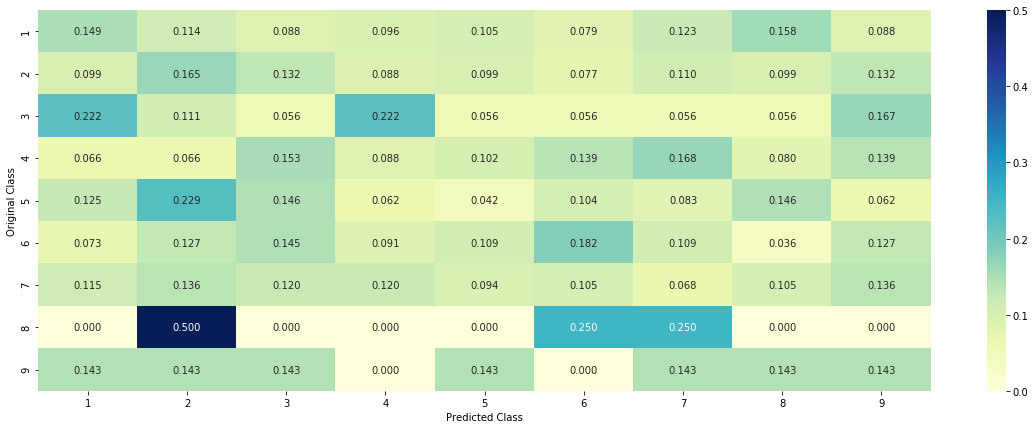

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

### Observation
    1. We made a random model to compare log loss with other models to understand it's sensibility.
    2. The log loss obtained is 2.47

<h2>3.3 Univariate Analysis</h2>

In [15]:
# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):


    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):

    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [16]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 234
BRCA1     154
TP53      111
EGFR       94
BRCA2      84
PTEN       82
BRAF       59
KIT        59
ERBB2      42
PIK3CA     42
ALK        42
Name: Gene, dtype: int64


In [17]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 234 different categories of genes in the train data, and they are distibuted as follows


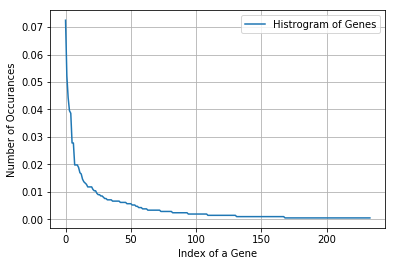

In [18]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


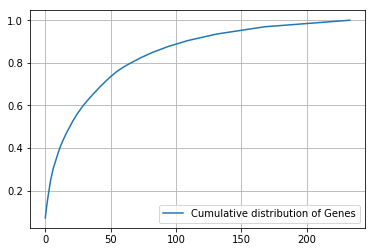

In [19]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

### Observation
    1. We find that 80% of the data is preserved in first 50 indiced of genes

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [20]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [21]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [22]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [23]:
# one-hot encoding of Gene feature.
gene_vectorizer3 = CountVectorizer(ngram_range=(1,2))
train_gene_feature_onehotCoding3 = gene_vectorizer3.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding3 = gene_vectorizer3.transform(test_df['Gene'])
cv_gene_feature_onehotCoding3 = gene_vectorizer3.transform(cv_df['Gene'])

In [24]:
# one hot encoding using Gene feature with tfidf vecotrizer
# one-hot encoding of Gene feature.
gene_vectorizer1 = TfidfVectorizer()
train_gene_feature_onehotCoding1 = gene_vectorizer1.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding1 = gene_vectorizer1.transform(test_df['Gene'])
cv_gene_feature_onehotCoding1 = gene_vectorizer1.transform(cv_df['Gene'])

In [71]:
# one hot encoding using Gene feature with tfidf vecotrizer
# one-hot encoding of Gene feature.
gene_vectorizer2 = TfidfVectorizer(max_features=200)
train_gene_feature_onehotCoding2 = gene_vectorizer2.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding2 = gene_vectorizer2.transform(test_df['Gene'])
cv_gene_feature_onehotCoding2 = gene_vectorizer2.transform(cv_df['Gene'])

In [26]:
train_df['Gene'].head()

2459    BRCA1
1072    FOXA1
3127     KRAS
2330     JAK2
66      PTPRT
Name: Gene, dtype: object

In [27]:
#gene_vectorizer.get_feature_names()

In [28]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 234)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.4179446004278788
For values of alpha =  0.0001 The log loss is: 1.1695950901095915
For values of alpha =  0.001 The log loss is: 1.1704082021673181
For values of alpha =  0.01 The log loss is: 1.2869553220400851
For values of alpha =  0.1 The log loss is: 1.3981993189050712
For values of alpha =  1 The log loss is: 1.4348180800056642


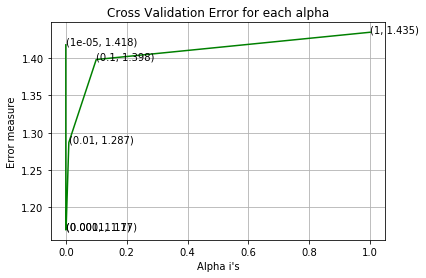

For values of best alpha =  0.0001 The train log loss is: 1.0670198080080562
For values of best alpha =  0.0001 The cross validation log loss is: 1.1695950901095915
For values of best alpha =  0.0001 The test log loss is: 1.202392227250145


In [29]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. We find that this feature is decent and useful in our model for predticting the classes.

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [30]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  234  genes in train dataset?
Ans
1. In test data 646 out of 665 : 97.14285714285714
2. In cross validation data 514 out of  532 : 96.61654135338345


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [31]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1927
Truncating_Mutations    60
Deletion                47
Amplification           44
Fusions                 23
Overexpression           5
G12V                     3
T58I                     2
Q61R                     2
A146T                    2
T73I                     2
Name: Variation, dtype: int64


In [32]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1927 different categories of variations in the train data, and they are distibuted as follows


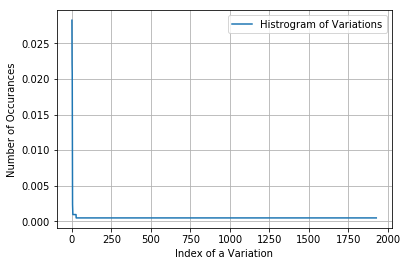

In [33]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02824859 0.05037665 0.07109228 ... 0.99905838 0.99952919 1.        ]


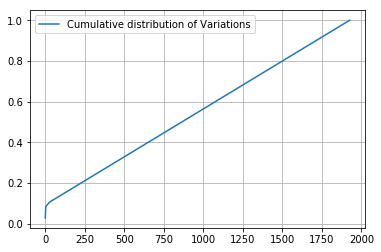

In [34]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

### Observation
    1. We find that data is non repititive and is non recurring.

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [35]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [36]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [37]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [38]:
# one-hot encoding of variation feature.
variation_vectorizer3 = CountVectorizer(ngram_range=(1,2))
train_variation_feature_onehotCoding3 = variation_vectorizer3.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding3 = variation_vectorizer3.transform(test_df['Variation'])
cv_variation_feature_onehotCoding3 = variation_vectorizer3.transform(cv_df['Variation'])

In [39]:
# one-hot encoding of variation feature.
variation_vectorizer1 = TfidfVectorizer()
train_variation_feature_onehotCoding1 = variation_vectorizer1.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding1 = variation_vectorizer1.transform(test_df['Variation'])
cv_variation_feature_onehotCoding1 = variation_vectorizer1.transform(cv_df['Variation'])

In [40]:
variation_vectorizer2 = TfidfVectorizer(ngram_range=(1,2),max_features=100)
train_variation_feature_onehotCoding2 = variation_vectorizer2.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding2 = variation_vectorizer2.transform(test_df['Variation'])
cv_variation_feature_onehotCoding2 = variation_vectorizer2.transform(cv_df['Variation'])

In [41]:
variation_vectorizer4 = TfidfVectorizer()
train_genevar_onehotCoding4 = variation_vectorizer4.fit_transform(train_df['feature_engineered'])
test_genevar_onehotCoding4 = variation_vectorizer4.transform(test_df['feature_engineered'])
cv_genevar_onehotCoding4 = variation_vectorizer4.transform(cv_df['feature_engineered'])

In [42]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1952)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7230672492592973
For values of alpha =  0.0001 The log loss is: 1.7120762969560592
For values of alpha =  0.001 The log loss is: 1.7144186876928018
For values of alpha =  0.01 The log loss is: 1.7280413847977085
For values of alpha =  0.1 The log loss is: 1.7391811071963998
For values of alpha =  1 The log loss is: 1.7404728714997448


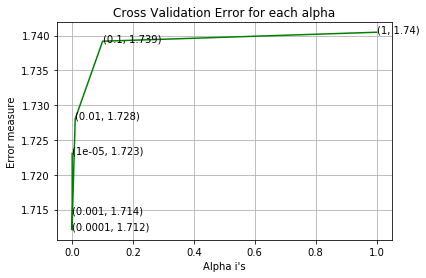

For values of best alpha =  0.0001 The train log loss is: 0.7164021409434114
For values of best alpha =  0.0001 The cross validation log loss is: 1.7120762969560592
For values of best alpha =  0.0001 The test log loss is: 1.7124401343812268


In [43]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. This feature is still useful and could be used for machine learning models.

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [44]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1927  genes in test and cross validation data sets?
Ans
1. In test data 68 out of 665 : 10.225563909774436
2. In cross validation data 54 out of  532 : 10.150375939849624


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

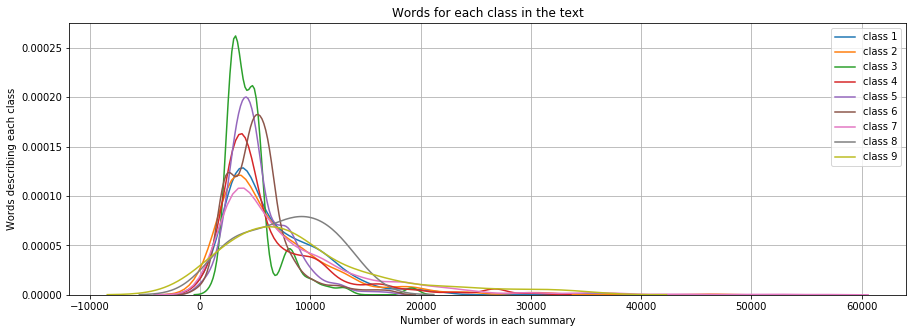

In [85]:
#boxplot and pdf
approvedw_count1 = result[result['Class']==1]['TEXT'].str.split().apply(len)
approvedw_count1 = approvedw_count1.values

approvedw_count2 = result[result['Class']==2]['TEXT'].str.split().apply(len)
approvedw_count2 = approvedw_count2.values

approvedw_count3 = result[result['Class']==3]['TEXT'].str.split().apply(len)
approvedw_count3 = approvedw_count3.values

approvedw_count4 = result[result['Class']==4]['TEXT'].str.split().apply(len)
approvedw_count4 = approvedw_count4.values

approvedw_count5 = result[result['Class']==5]['TEXT'].str.split().apply(len)
approvedw_count5 = approvedw_count5.values

approvedw_count6 = result[result['Class']==6]['TEXT'].str.split().apply(len)
approvedw_count6 = approvedw_count6.values

approvedw_count7 = result[result['Class']==7]['TEXT'].str.split().apply(len)
approvedw_count7 = approvedw_count7.values

approvedw_count8 = result[result['Class']==8]['TEXT'].str.split().apply(len)
approvedw_count8 = approvedw_count8.values

approvedw_count9 = result[result['Class']==9]['TEXT'].str.split().apply(len)
approvedw_count9 = approvedw_count9.values


plt.figure(figsize=(15,5))
plt.ylabel('Words describing each class')
plt.grid()
sns.distplot(approvedw_count1, hist=False, label="class 1")
sns.distplot(approvedw_count2, hist=False, label="class 2")
sns.distplot(approvedw_count3, hist=False, label="class 3")
sns.distplot(approvedw_count4, hist=False, label="class 4")
sns.distplot(approvedw_count5, hist=False, label="class 5")
sns.distplot(approvedw_count6, hist=False, label="class 6")
sns.distplot(approvedw_count7, hist=False, label="class 7")
sns.distplot(approvedw_count8, hist=False, label="class 8")
sns.distplot(approvedw_count9, hist=False, label="class 9")

plt.title('Words for each class in the text')
plt.xlabel('Number of words in each summary')
plt.legend()

plt.show()

#### Observation
    1. The words for class 3 are more in the range of 10000
    2. Text of classes is distributed all over 0 to 20000.
    3. We can't find any strong correlations. 

In [45]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [46]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in tqdm(range(0,9)):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [47]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52986


In [48]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [49]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:36<00:00,  4.08s/it]


In [50]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [51]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [52]:
# don't forget to normalize every feature
text_vectorizer3= CountVectorizer(min_df=10, ngram_range=(1,2))
text_vectorizer3.fit(train_df['TEXT'])
train_text_feature_onehotCoding3 = text_vectorizer3.transform(train_df['TEXT'])
train_text_feature_onehotCoding3 = normalize(train_text_feature_onehotCoding3, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding3 = text_vectorizer3.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding3 = normalize(test_text_feature_onehotCoding3, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding3= text_vectorizer3.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding3 = normalize(cv_text_feature_onehotCoding3, axis=0)

In [53]:
# don't forget to normalize every feature
text_vectorizer1= TfidfVectorizer(min_df=3)
text_vectorizer1.fit(train_df['TEXT'])
train_text_feature_onehotCoding1 = text_vectorizer1.transform(train_df['TEXT'])
train_text_feature_onehotCoding1 = normalize(train_text_feature_onehotCoding1, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding1 = text_vectorizer1.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding1 = normalize(test_text_feature_onehotCoding1, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding1= text_vectorizer1.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding1 = normalize(cv_text_feature_onehotCoding1, axis=0)

In [54]:
# don't forget to normalize every feature
text_vectorizer2= TfidfVectorizer(min_df=3, max_features=1000)
text_vectorizer2.fit(train_df['TEXT'])
train_text_feature_onehotCoding2 = text_vectorizer2.transform(train_df['TEXT'])
train_text_feature_onehotCoding2 = normalize(train_text_feature_onehotCoding2, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding2 = text_vectorizer2.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding2 = normalize(test_text_feature_onehotCoding2, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding2= text_vectorizer2.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding2 = normalize(cv_text_feature_onehotCoding2, axis=0)

In [55]:
# don't forget to normalize every feature
text_vectorizer4= TfidfVectorizer(ngram_range=(1,4), max_features=2000)
text_vectorizer4.fit(train_df['TEXT'])
train_text_feature_onehotCoding4 = text_vectorizer4.transform(train_df['TEXT'])
train_text_feature_onehotCoding4 = normalize(train_text_feature_onehotCoding4, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding4 = text_vectorizer4.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding4 = normalize(test_text_feature_onehotCoding4, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding4= text_vectorizer4.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding4 = normalize(cv_text_feature_onehotCoding4, axis=0)

In [56]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [57]:
# Number of words for a given frequency.
#print(Counter(sorted_text_occur))

For values of alpha =  1e-05 The log loss is: 1.3876963349782352
For values of alpha =  0.0001 The log loss is: 1.3371141516109786
For values of alpha =  0.001 The log loss is: 1.1735784404375604
For values of alpha =  0.01 The log loss is: 1.222046322809946
For values of alpha =  0.1 The log loss is: 1.454089845384952
For values of alpha =  1 The log loss is: 1.659391821599621


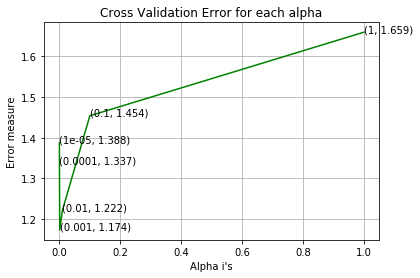

For values of best alpha =  0.001 The train log loss is: 0.7652701318257731
For values of best alpha =  0.001 The cross validation log loss is: 1.1735784404375604
For values of best alpha =  0.001 The test log loss is: 1.1501719826461423


In [58]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. The text feature is quite useful for machine learining models since the log loss is less than
       random classifier log loss.

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [59]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [60]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.72 % of word of test data appeared in train data
96.751 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [61]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [62]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [63]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [72]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))


train_gene_var_onehotCoding1 = hstack((train_gene_feature_onehotCoding1,train_variation_feature_onehotCoding1))
test_gene_var_onehotCoding1 = hstack((test_gene_feature_onehotCoding1,test_variation_feature_onehotCoding1))
cv_gene_var_onehotCoding1 = hstack((cv_gene_feature_onehotCoding1,cv_variation_feature_onehotCoding1))

train_gene_var_onehotCoding2 = hstack((train_gene_feature_onehotCoding2,train_variation_feature_onehotCoding2))
test_gene_var_onehotCoding2 = hstack((test_gene_feature_onehotCoding2,test_variation_feature_onehotCoding2))
cv_gene_var_onehotCoding2 = hstack((cv_gene_feature_onehotCoding2,cv_variation_feature_onehotCoding2))

train_gene_var_onehotCoding3 = hstack((train_gene_feature_onehotCoding3,train_variation_feature_onehotCoding3))
test_gene_var_onehotCoding3 = hstack((test_gene_feature_onehotCoding3,test_variation_feature_onehotCoding3))
cv_gene_var_onehotCoding3 = hstack((cv_gene_feature_onehotCoding3,cv_variation_feature_onehotCoding3))




train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_x_onehotCoding1 = hstack((train_gene_var_onehotCoding1, train_text_feature_onehotCoding1)).tocsr()
train_x_onehotCoding4 = hstack((train_gene_var_onehotCoding2, train_text_feature_onehotCoding4)).tocsr()
train_x_onehotCoding2 = hstack((train_gene_var_onehotCoding2, train_text_feature_onehotCoding2)).tocsr()
train_x_onehotCoding3 = hstack((train_gene_var_onehotCoding3, train_text_feature_onehotCoding3)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_x_onehotCoding1 = hstack((test_gene_var_onehotCoding1, test_text_feature_onehotCoding1)).tocsr()
test_x_onehotCoding4 = hstack((test_gene_var_onehotCoding2, test_text_feature_onehotCoding4)).tocsr()
test_x_onehotCoding2 = hstack((test_gene_var_onehotCoding2, test_text_feature_onehotCoding2)).tocsr()
test_x_onehotCoding3 = hstack((test_gene_var_onehotCoding3, test_text_feature_onehotCoding3)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_x_onehotCoding1 = hstack((cv_gene_var_onehotCoding1, cv_text_feature_onehotCoding1)).tocsr()
cv_x_onehotCoding4 = hstack((cv_gene_var_onehotCoding2, cv_text_feature_onehotCoding4)).tocsr()
cv_x_onehotCoding2 = hstack((cv_gene_var_onehotCoding2, cv_text_feature_onehotCoding2)).tocsr()
cv_x_onehotCoding3 = hstack((cv_gene_var_onehotCoding3, cv_text_feature_onehotCoding3)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [65]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55172)
(number of data points * number of features) in test data =  (665, 55172)
(number of data points * number of features) in cross validation data = (532, 55172)


In [66]:
print("One hot encoding features(TF-IDF):")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding1.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding1.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding1.shape)

One hot encoding features(TF-IDF):
(number of data points * number of features) in train data =  (2124, 55172)
(number of data points * number of features) in test data =  (665, 55172)
(number of data points * number of features) in cross validation data = (532, 55172)


In [67]:
print("One hot encoding features(uni-gram and bi-gram):")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding3.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding3.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding3.shape)

One hot encoding features(uni-gram and bi-gram):
(number of data points * number of features) in train data =  (2124, 233840)
(number of data points * number of features) in test data =  (665, 233840)
(number of data points * number of features) in cross validation data = (532, 233840)


In [68]:
print("One hot encoding top 1000 features(TF-IDF):")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding2.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding2.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding2.shape)

One hot encoding top 1000 features(TF-IDF):
(number of data points * number of features) in train data =  (2124, 1300)
(number of data points * number of features) in test data =  (665, 1300)
(number of data points * number of features) in cross validation data = (532, 1300)


In [69]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h1>4.1. Base Line Model</h2>

<h2>4.1.1. Naive Bayes</h3>

<h3>4.1.1.1. TF-idf one hot encoding</h3>

<h4>4.1.1.1.1 Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.3194240201792393
for alpha = 0.0001
Log Loss : 1.322610525590651
for alpha = 0.001
Log Loss : 1.2974156999846143
for alpha = 0.1
Log Loss : 1.3145133648944665
for alpha = 1
Log Loss : 1.3499115656097183
for alpha = 10
Log Loss : 1.3882171668759458
for alpha = 100
Log Loss : 1.3332207001877054
for alpha = 1000
Log Loss : 1.2993355253742123


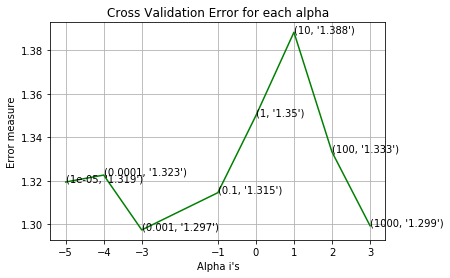

For values of best alpha =  0.001 The train log loss is: 0.8517582367288858
For values of best alpha =  0.001 The cross validation log loss is: 1.2974156999846143
For values of best alpha =  0.001 The test log loss is: 1.2019296295210224


In [68]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding1,train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. Here We've used Naive bayes which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.20.
    3. It's better compared to count vectorizer.

<h4>4.1.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2974156999846143
Number of missclassified point : 0.39849624060150374
-------------------- Confusion matrix --------------------


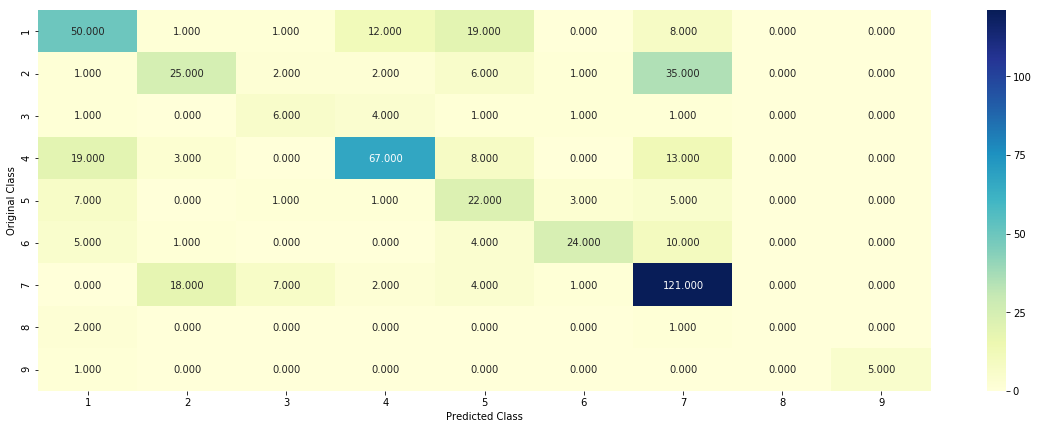

-------------------- Precision matrix (Columm Sum=1) --------------------


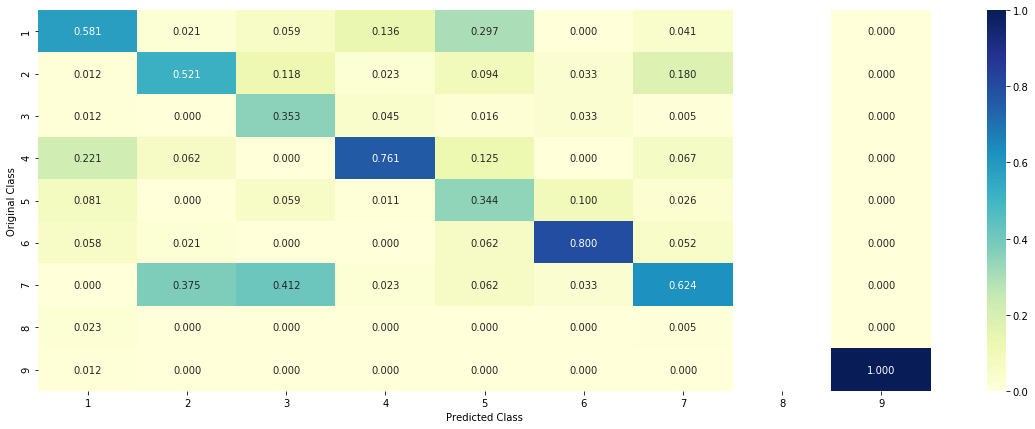

-------------------- Recall matrix (Row sum=1) --------------------


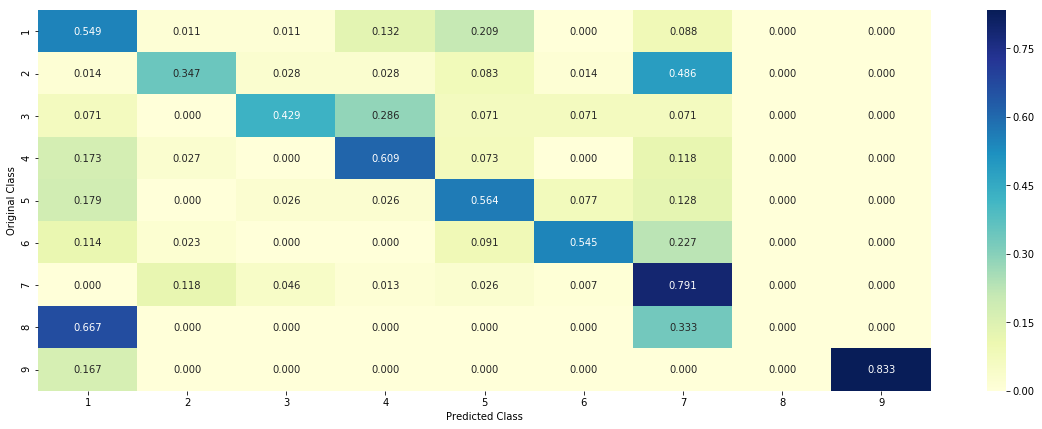

In [69]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding1)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding1.toarray()))

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model seems to get confused between class 2 and class 7
    

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [70]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1158 0.108  0.0162 0.1416 0.4247 0.0487 0.1346 0.0059 0.0044]]
Actual Class : 5
--------------------------------------------------
6 Text feature [assays] present in test data point [True]
7 Text feature [functional] present in test data point [True]
8 Text feature [nhgri] present in test data point [True]
9 Text feature [assay] present in test data point [True]
10 Text feature [variants] present in test data point [True]
11 Text feature [neutral] present in test data point [True]
12 Text feature [based] present in test data point [True]
13 Text feature [controls] present in test data point [True]
14 Text feature [v1736a] present in test data point [True]
15 Text feature [intermediate] present in test data point [True]
16 Text feature [introduction] present in test data point [True]
17 Text feature [results] present in test data point [True]
18 Text feature [research] present in test data point [True]
19 Text feature [clear] presen

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [71]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0976 0.5639 0.0136 0.1197 0.042  0.0411 0.1135 0.005  0.0037]]
Actual Class : 2
--------------------------------------------------
12 Text feature [treatment] present in test data point [True]
14 Text feature [molecular] present in test data point [True]
15 Text feature [response] present in test data point [True]
16 Text feature [therapy] present in test data point [True]
17 Text feature [clinical] present in test data point [True]
21 Text feature [time] present in test data point [True]
26 Text feature [study] present in test data point [True]
27 Text feature [treated] present in test data point [True]
28 Text feature [13] present in test data point [True]
29 Text feature [including] present in test data point [True]
31 Text feature [12] present in test data point [True]
32 Text feature [mutation] present in test data point [True]
33 Text feature [confirmed] present in test data point [True]
34 Text feature [however] present in t

### 4.1.1.3 With TF-IDF using top 1000 features 

#### Hyper parameter tuning

for alpha = 1e-05
Log Loss : 1.2529076994492443
for alpha = 0.0001
Log Loss : 1.2522160223154715
for alpha = 0.001
Log Loss : 1.2508565428742573
for alpha = 0.1
Log Loss : 1.2916245364913155
for alpha = 1
Log Loss : 1.2558984092013843
for alpha = 10
Log Loss : 1.4216193853681414
for alpha = 100
Log Loss : 1.4448063003027982
for alpha = 1000
Log Loss : 1.4455464401368308


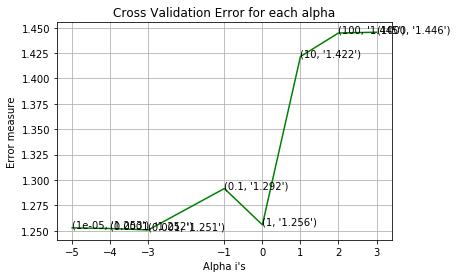

For values of best alpha =  0.001 The train log loss is: 0.7749136954098901
For values of best alpha =  0.001 The cross validation log loss is: 1.2508565428742573
For values of best alpha =  0.001 The test log loss is: 1.1562443828692746


In [118]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding2,train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. Here We've used Naive bayes which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.15.
    3. It's better compared to Tf-idf with all the features.

#### Testing with Test data

Log Loss : 1.2508565428742573
Number of missclassified point : 0.40789473684210525
-------------------- Confusion matrix --------------------


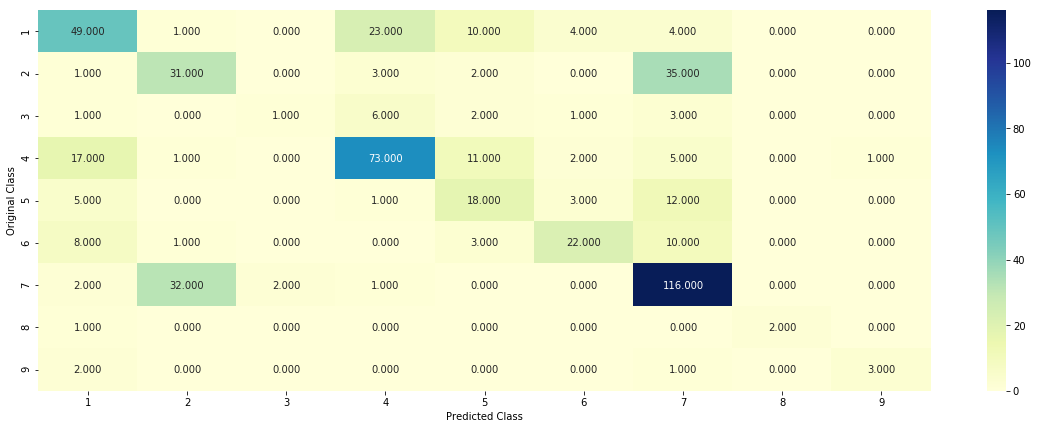

-------------------- Precision matrix (Columm Sum=1) --------------------


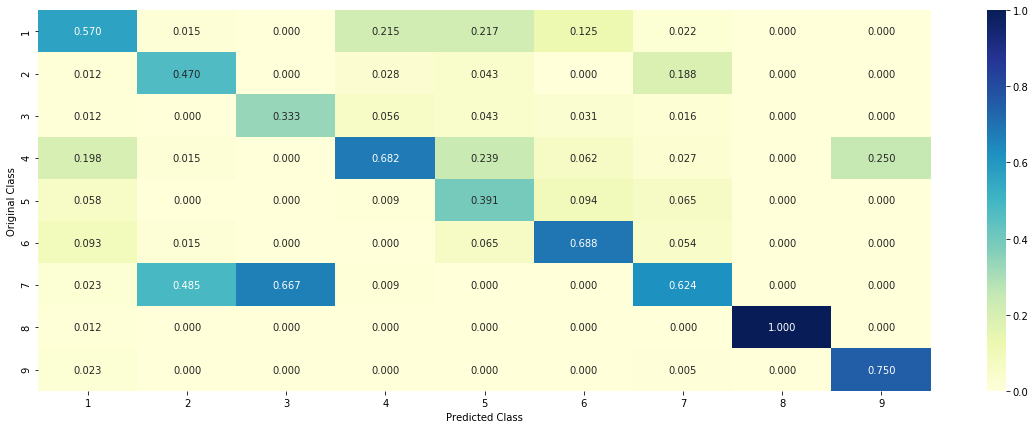

-------------------- Recall matrix (Row sum=1) --------------------


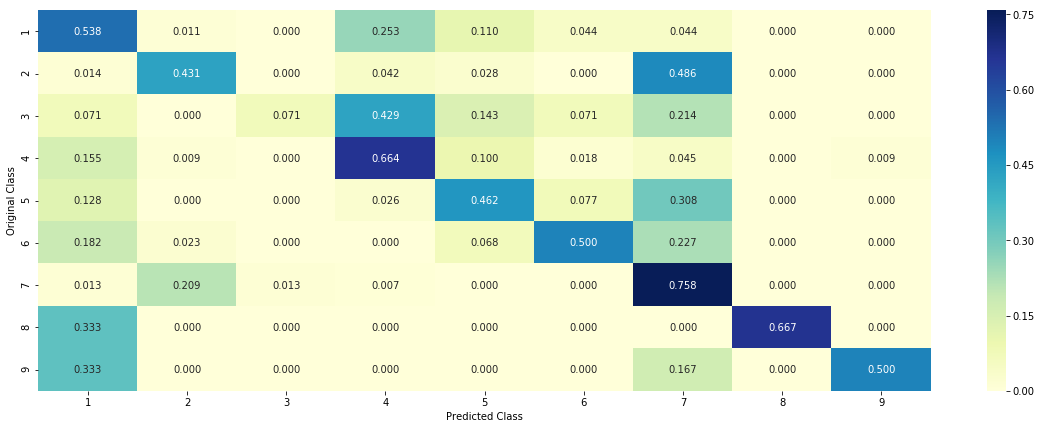

In [119]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding2)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding2.toarray()))

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model seems to get confused between class 2 and class 7

In [120]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3,max_features=1000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

#### Feature importance,correctly Classified point

In [121]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0891 0.0651 0.0182 0.0758 0.611  0.0393 0.0934 0.0042 0.0038]]
Actual Class : 5
--------------------------------------------------
9 Text feature [17] present in test data point [True]
16 Text feature [16] present in test data point [True]
31 Text feature [12] present in test data point [True]
Out of the top  100  features  3 are present in query point


#### Feature importance, Incorrectly classified point

In [122]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0782 0.2405 0.0165 0.0684 0.04   0.0353 0.5138 0.0038 0.0035]]
Actual Class : 2
--------------------------------------------------
87 Text feature [13] present in test data point [True]
95 Text feature [2010] present in test data point [True]
Out of the top  100  features  2 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.1264285035824926
for alpha = 11
Log Loss : 1.1356586899886019
for alpha = 15
Log Loss : 1.1446219328405158
for alpha = 21
Log Loss : 1.1486379636819857
for alpha = 31
Log Loss : 1.1487229728151833
for alpha = 41
Log Loss : 1.156037981640947
for alpha = 51
Log Loss : 1.1531381607842646
for alpha = 99
Log Loss : 1.1590250678646192


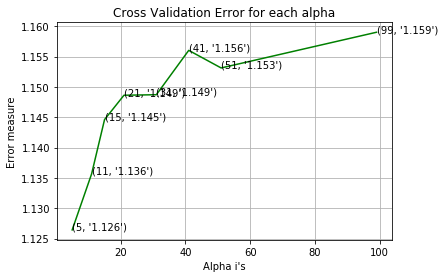

For values of best alpha =  5 The train log loss is: 0.5003730247523339
For values of best alpha =  5 The cross validation log loss is: 1.1264285035824926
For values of best alpha =  5 The test log loss is: 0.9742974331506327


In [72]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Observation
    1. Here We've used KNN which works quite well with Response coding.
    2. The log loss is 0.97.
    3. It's better compared to count vectorizer.


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.1264285035824926
Number of mis-classified points : 0.3815789473684211
-------------------- Confusion matrix --------------------


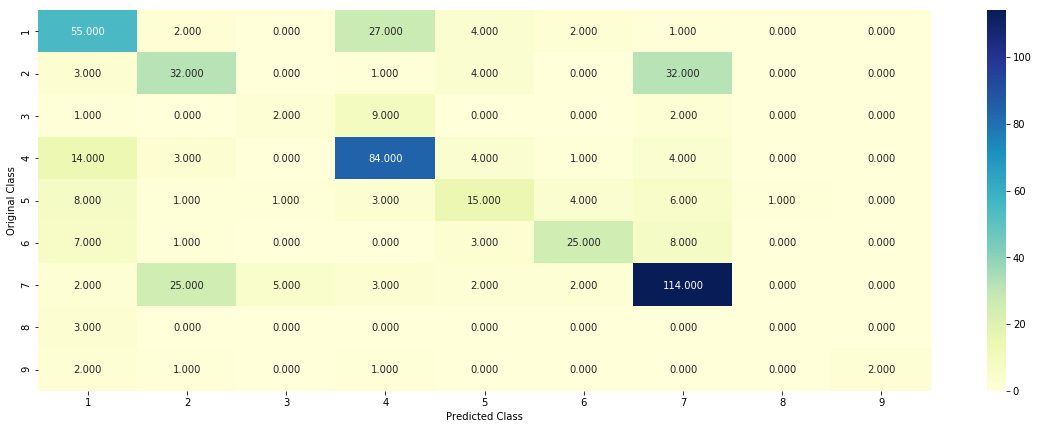

-------------------- Precision matrix (Columm Sum=1) --------------------


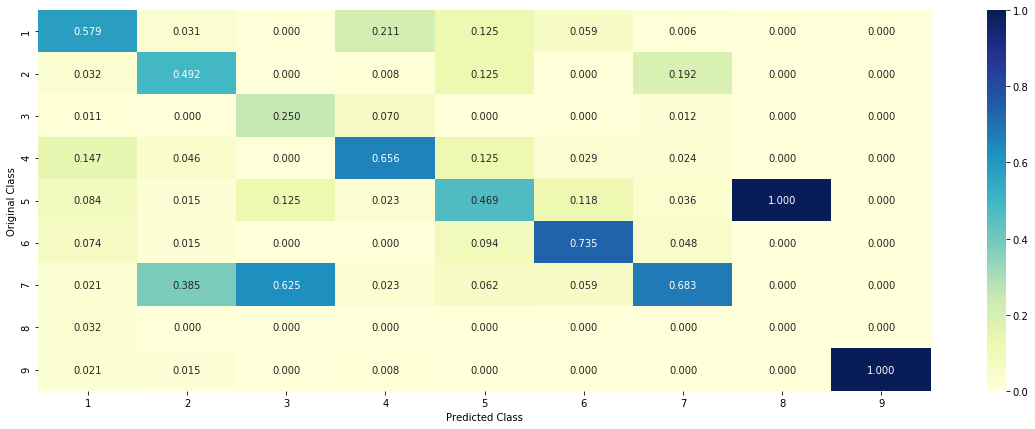

-------------------- Recall matrix (Row sum=1) --------------------


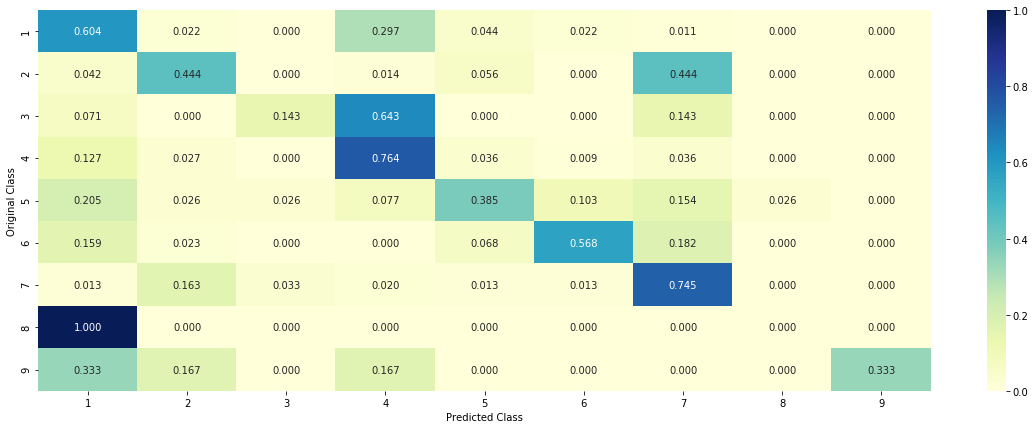

In [73]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model seems to get confused between class 2 and class 7

<h3>4.2.3.Sample Query point -1</h3>

In [74]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 5
The  5  nearest neighbours of the test points belongs to classes [1 1 1 1 1]
Fequency of nearest points : Counter({1: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [75]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [2 2 7 7 2]
Fequency of nearest points : Counter({2: 3, 7: 2})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing using TFIDF vectorizer</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3481806073245912
for alpha = 1e-05
Log Loss : 1.3201258902463686
for alpha = 0.0001
Log Loss : 1.2397058329570327
for alpha = 0.001
Log Loss : 1.0447966698650455
for alpha = 0.01
Log Loss : 1.1234445391215628
for alpha = 0.1
Log Loss : 1.2724796328578662
for alpha = 1
Log Loss : 1.5034626913851055
for alpha = 10
Log Loss : 1.5466614951357887
for alpha = 100
Log Loss : 1.5516328893065285


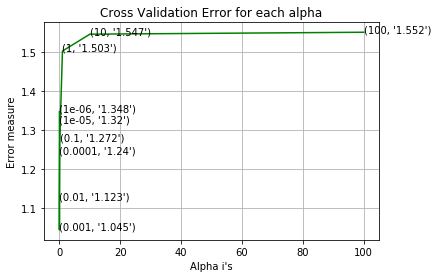

For values of best alpha =  0.001 The train log loss is: 0.5911111020586185
For values of best alpha =  0.001 The cross validation log loss is: 1.0447966698650455
For values of best alpha =  0.001 The test log loss is: 1.0303804399637155


In [76]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used LR which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.004.
    3. It's better compared to count vectorizer.

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1671835976860305
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


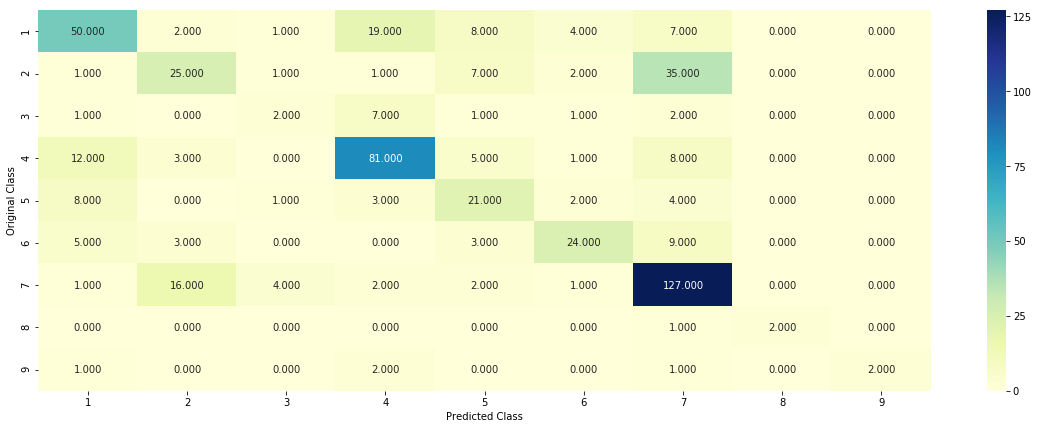

-------------------- Precision matrix (Columm Sum=1) --------------------


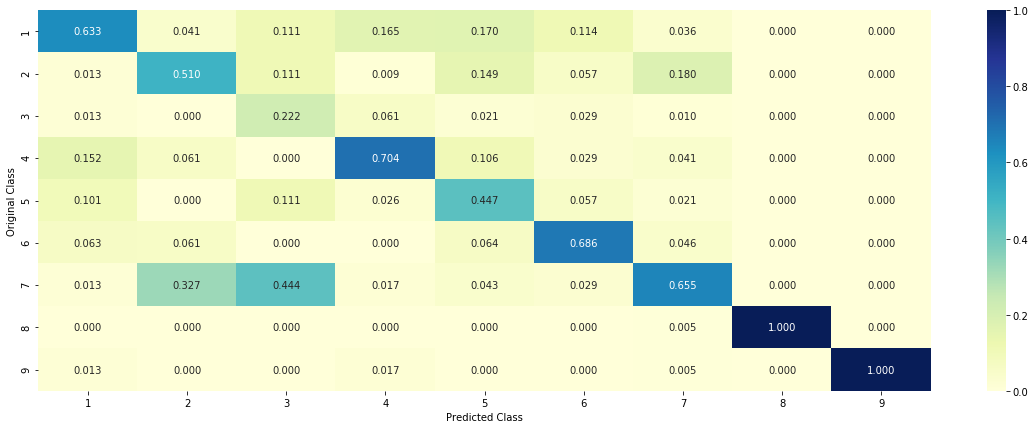

-------------------- Recall matrix (Row sum=1) --------------------


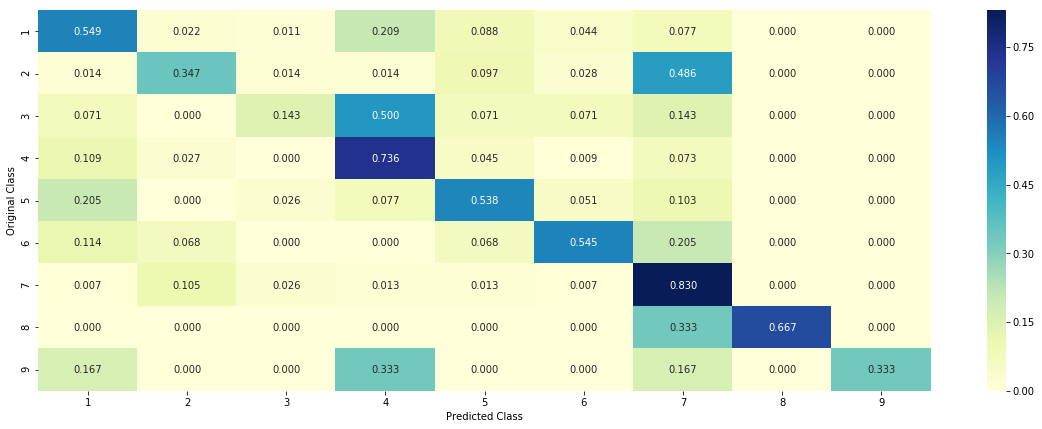

In [158]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding1, train_y, cv_x_onehotCoding1, cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model seems to best model so far with quite decent predictions

<h4>4.3.1.3. Feature Importance</h4>

In [78]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [79]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding1,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4902 0.0142 0.0034 0.1561 0.3138 0.0064 0.0043 0.0064 0.0053]]
Actual Class : 5
--------------------------------------------------
281 Text feature [tnt] present in test data point [True]
424 Text feature [nnsplice] present in test data point [True]
490 Text feature [immobilized] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [80]:
test_point_index = 101
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.500e-03 4.800e-03 8.000e-04 2.500e-03 3.220e-02 4.000e-04 9.497e-01
  4.500e-03 2.500e-03]]
Actual Class : 7
--------------------------------------------------
20 Text feature [constitutive] present in test data point [True]
21 Text feature [nude] present in test data point [True]
24 Text feature [activated] present in test data point [True]
39 Text feature [mitogen] present in test data point [True]
75 Text feature [activation] present in test data point [True]
81 Text feature [subcutaneously] present in test data point [True]
99 Text feature [oncogene] present in test data point [True]
102 Text feature [balb] present in test data point [True]
177 Text feature [downstream] present in test data point [True]
203 Text feature [activate] present in test data point [True]
242 Text feature [cylinders] present in test data point [True]
288 Text feature [mapk] present in test data point [True]
313 Text feature [activating] present in test

<h3>4.3.2. Without Class balancing using TF-IDF vectorizer</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.420341344261122
for alpha = 1e-05
Log Loss : 1.419001100977907
for alpha = 0.0001
Log Loss : 1.365863486006181
for alpha = 0.001
Log Loss : 1.1957365108168896
for alpha = 0.01
Log Loss : 1.2598941453373256
for alpha = 0.1
Log Loss : 1.3511076452616102
for alpha = 1
Log Loss : 1.509637558384335


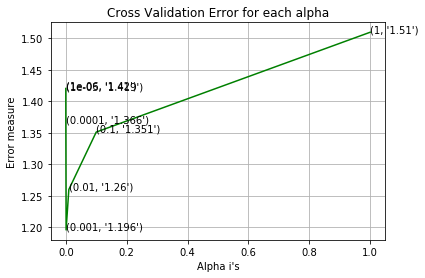

For values of best alpha =  0.001 The train log loss is: 0.6029917011048662
For values of best alpha =  0.001 The cross validation log loss is: 1.1957365108168896
For values of best alpha =  0.001 The test log loss is: 1.040853380142247


In [81]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used LR which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.04.
    3. It's better compared to count vectorizer.

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1957365108168896
Number of mis-classified points : 0.39097744360902253
-------------------- Confusion matrix --------------------


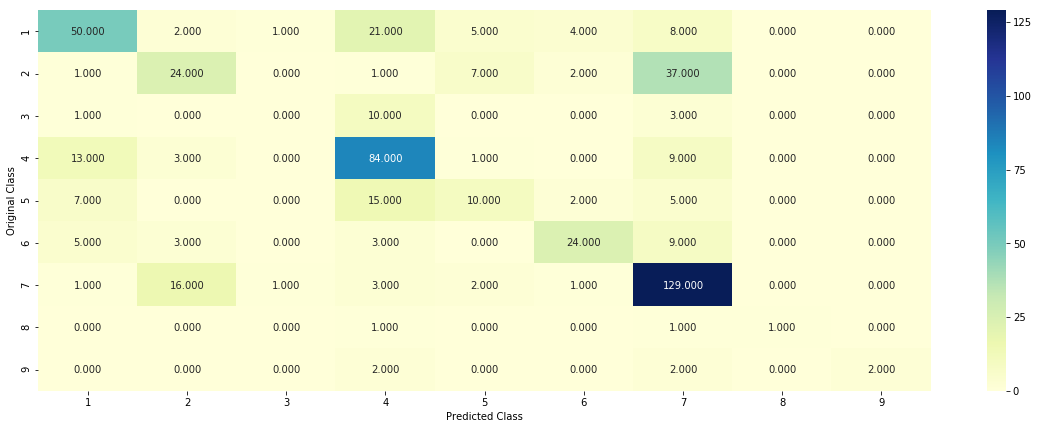

-------------------- Precision matrix (Columm Sum=1) --------------------


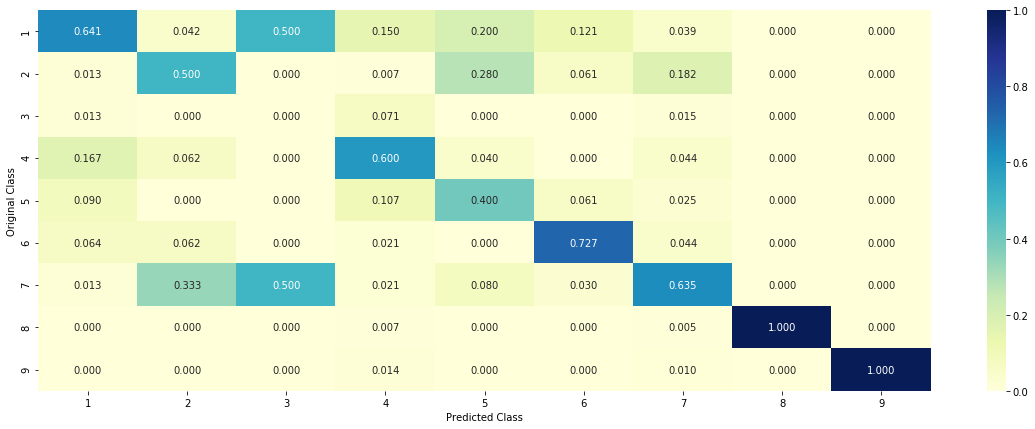

-------------------- Recall matrix (Row sum=1) --------------------


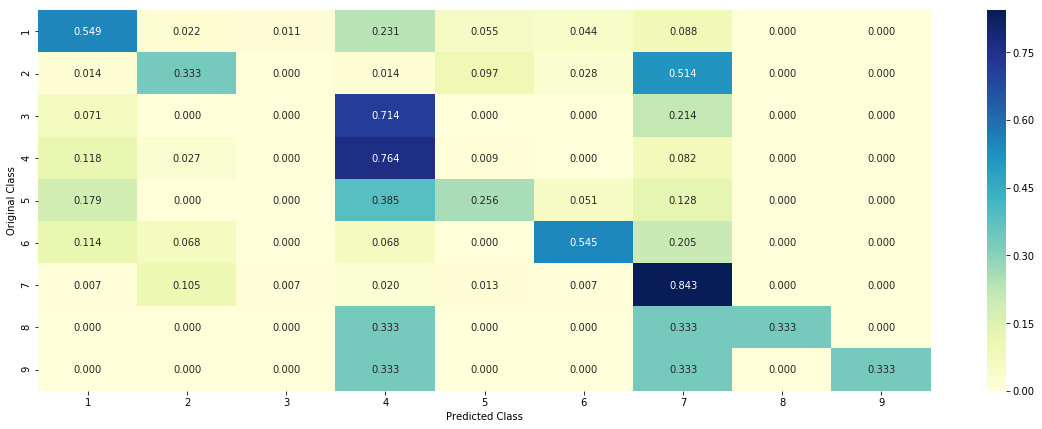

In [82]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding1, train_y, cv_x_onehotCoding1, cv_y, clf)

### Observation    
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model has classfication error a little more than one when it is not class balanced.

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [83]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding1,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[4.841e-01 1.490e-02 1.200e-03 2.155e-01 2.704e-01 3.500e-03 7.500e-03
  2.600e-03 2.000e-04]]
Actual Class : 5
--------------------------------------------------
311 Text feature [tnt] present in test data point [True]
424 Text feature [nnsplice] present in test data point [True]
Out of the top  500  features  2 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [84]:
test_point_index = 101
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[3.300e-03 4.300e-03 1.000e-04 4.500e-03 1.690e-02 3.000e-04 9.688e-01
  1.800e-03 0.000e+00]]
Actual Class : 7
--------------------------------------------------
49 Text feature [nude] present in test data point [True]
50 Text feature [constitutive] present in test data point [True]
62 Text feature [activated] present in test data point [True]
96 Text feature [mitogen] present in test data point [True]
137 Text feature [activation] present in test data point [True]
138 Text feature [subcutaneously] present in test data point [True]
151 Text feature [oncogene] present in test data point [True]
184 Text feature [activate] present in test data point [True]
203 Text feature [downstream] present in test data point [True]
256 Text feature [phosphorylation] present in test data point [True]
267 Text feature [balb] present in test data point [True]
269 Text feature [activating] present in test data point [True]
303 Text feature [inhibitor] p

<h3>4.3.3. With Class balancing using count vectorizer with uni-gram and bi-gram features</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4899923003390567
for alpha = 1e-05
Log Loss : 1.4779850785142485
for alpha = 0.0001
Log Loss : 1.5014048317611997
for alpha = 0.001
Log Loss : 1.3245028342128824
for alpha = 0.01
Log Loss : 1.187380413492543
for alpha = 0.1
Log Loss : 1.326074744607126
for alpha = 1
Log Loss : 1.4940805225828537
for alpha = 10
Log Loss : 1.5589794352846749
for alpha = 100
Log Loss : 1.5683584426295465


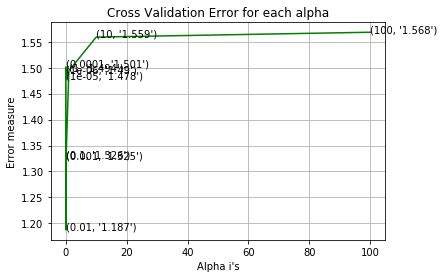

For values of best alpha =  0.01 The train log loss is: 0.8088454655805267
For values of best alpha =  0.01 The cross validation log loss is: 1.187380413492543
For values of best alpha =  0.01 The test log loss is: 1.0864625098753262


In [85]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding3, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding3, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding3)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding3, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding3, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding3)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding3)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding3)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used LR which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.08.
    3. It's better compared to count vectorizer.

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.187380413492543
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


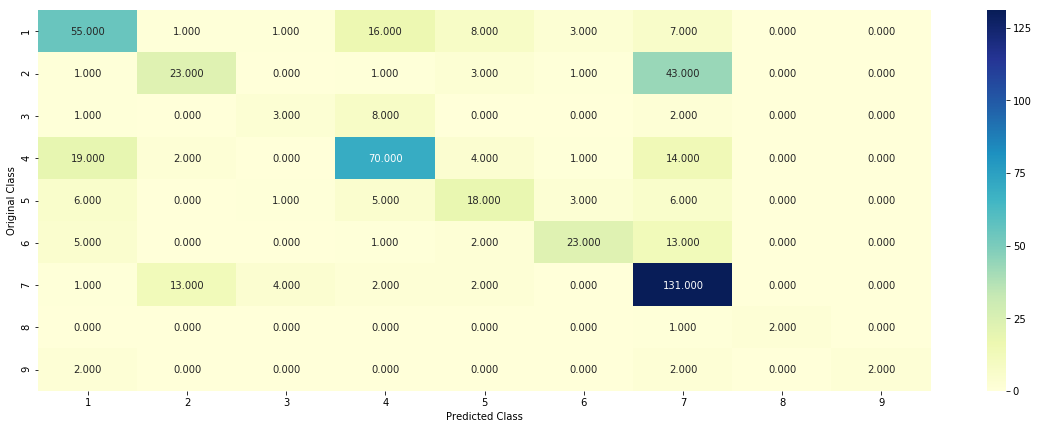

-------------------- Precision matrix (Columm Sum=1) --------------------


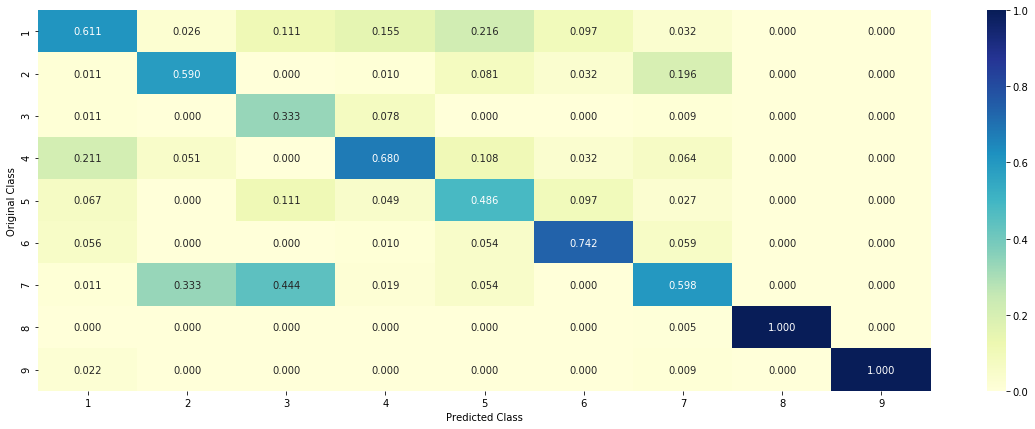

-------------------- Recall matrix (Row sum=1) --------------------


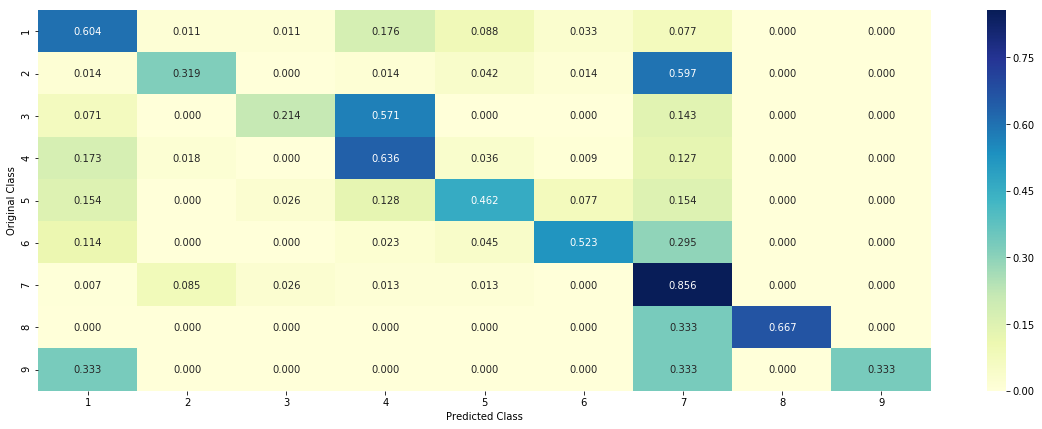

In [86]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding3, train_y, cv_x_onehotCoding3, cv_y, clf)

### Observation    
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model works fairly well.

In [87]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer(ngram_range=(1,2))
    var_count_vec = CountVectorizer(ngram_range=(1,2))
    text_count_vec = CountVectorizer(ngram_range=(1,2),min_df=10)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in tqdm(enumerate(indices)):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h4>4.3.2.4. Feature Importance, Incorrectly Classified point</h4>

In [91]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding3,train_y)
test_point_index = 106
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding3[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding3[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1865 0.0955 0.0137 0.3403 0.037  0.0251 0.2905 0.0084 0.003 ]]
Actual Class : 5
--------------------------------------------------


19it [00:00, 18.25it/s]

20 Text feature [acetyl] present in test data point [True]


168it [00:48,  2.94it/s]

168 Text feature [coa] present in test data point [True]


500it [02:32,  2.96it/s]


Out of the top  500  features  2 are present in query point


<h4>4.3.2.4. Feature Importance, correctly Classified point</h4>

In [89]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding3[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding3[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.300e-03 1.010e-02 7.000e-04 2.000e-03 1.920e-02 6.000e-04 9.589e-01
  3.000e-03 1.000e-04]]
Actual Class : 7
--------------------------------------------------


25it [00:01,  8.59it/s]

25 Text feature [constitutive] present in test data point [True]


41it [00:06,  2.95it/s]

41 Text feature [nude] present in test data point [True]


113it [00:30,  2.89it/s]

113 Text feature [subcutaneously] present in test data point [True]


143it [00:39,  3.06it/s]

143 Text feature [oncogene] present in test data point [True]


154it [00:42,  3.29it/s]

154 Text feature [activated] present in test data point [True]


210it [01:01,  2.84it/s]

210 Text feature [cylinders] present in test data point [True]


236it [01:09,  3.04it/s]

236 Text feature [rac] present in test data point [True]


241it [01:11,  2.92it/s]

241 Text feature [mitogen] present in test data point [True]


500it [02:40,  3.12it/s]


Out of the top  500  features  8 are present in query point


### 4.3.4 With TF-IDF vectorizer using top 1000 features

#### Hyper parameter Tuning

for alpha = 1e-06
Log Loss : 1.2220390587371812
for alpha = 1e-05
Log Loss : 1.193935347175036
for alpha = 0.0001
Log Loss : 1.0982581889735992
for alpha = 0.001
Log Loss : 1.1687381894180742
for alpha = 0.01
Log Loss : 1.4264357833699213
for alpha = 0.1
Log Loss : 1.8013702576005746
for alpha = 1
Log Loss : 1.900767491712513


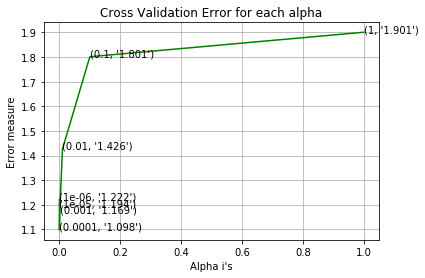

For values of best alpha =  0.0001 The train log loss is: 0.591889471023152
For values of best alpha =  0.0001 The cross validation log loss is: 1.0982581889735992
For values of best alpha =  0.0001 The test log loss is: 1.0118842982497807


In [123]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used LR which works quite well with TF-IDF vectorizer using top 1000 features.
    2. The log loss is 1.01.
    3. It's better compared to count vectorizer.

#### Testing with Test data

Log loss : 1.0982581889735992
Number of mis-classified points : 0.36654135338345867
-------------------- Confusion matrix --------------------


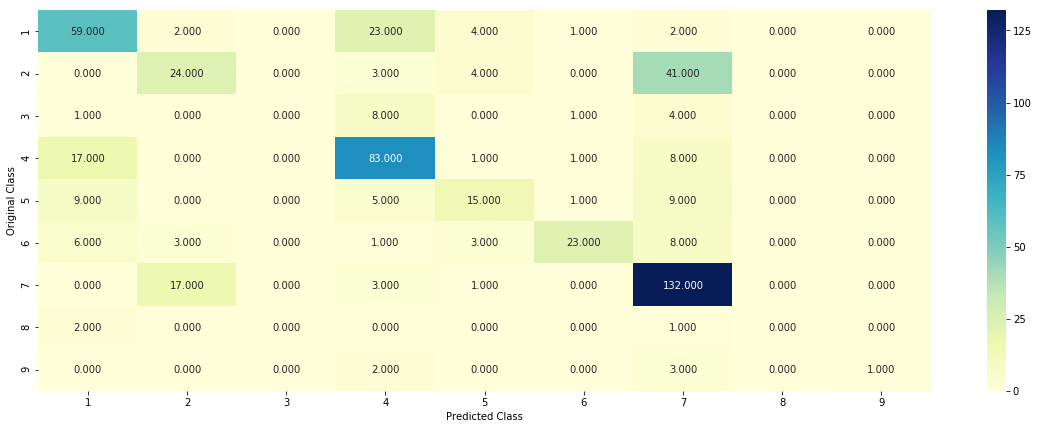

-------------------- Precision matrix (Columm Sum=1) --------------------


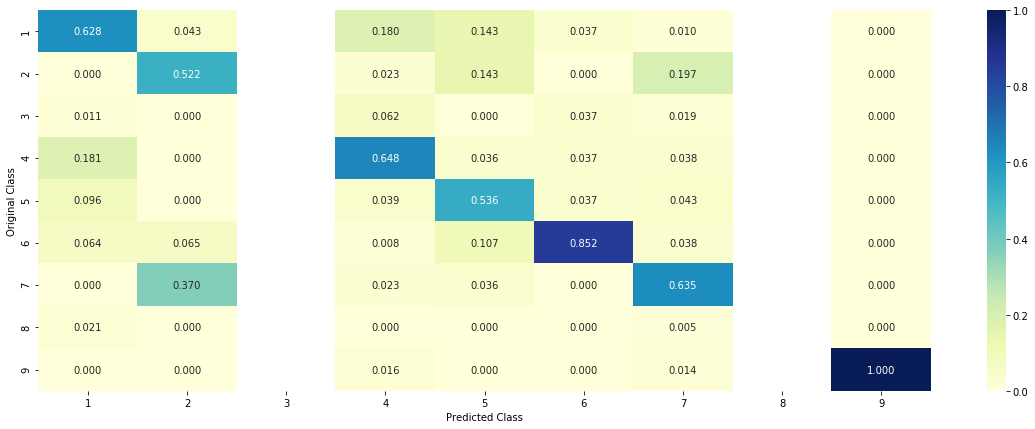

-------------------- Recall matrix (Row sum=1) --------------------


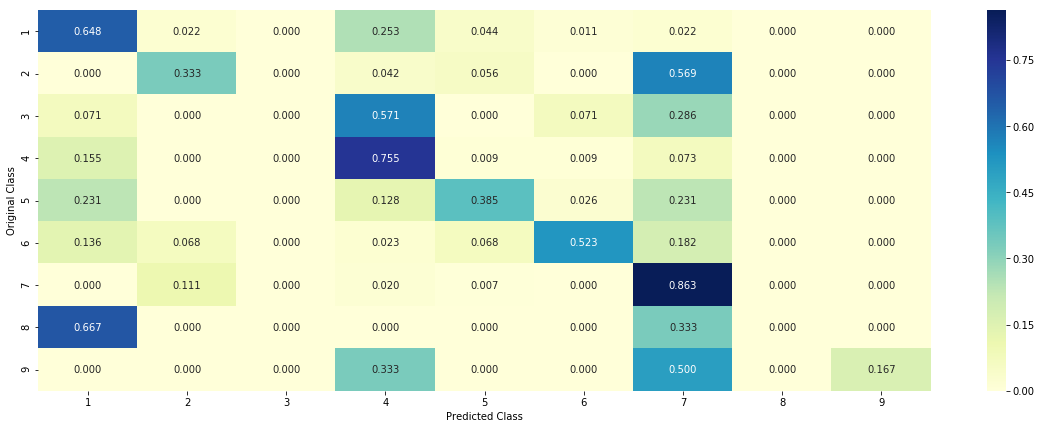

In [124]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding2, train_y, cv_x_onehotCoding2, cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model is good as TF-idf with all features

#### Feature importance, incorrectly classified point

In [125]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding2,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[5.172e-01 3.200e-03 2.300e-03 1.955e-01 2.757e-01 2.600e-03 1.700e-03
  1.700e-03 1.000e-04]]
Actual Class : 5
--------------------------------------------------
291 Text feature [23] present in test data point [True]
325 Text feature [15] present in test data point [True]
340 Text feature [2011] present in test data point [True]
343 Text feature [20] present in test data point [True]
397 Text feature [10] present in test data point [True]
432 Text feature [14] present in test data point [True]
Out of the top  500  features  6 are present in query point


#### Feature importance, correctly Classified point

In [127]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding2,train_y)
test_point_index = 101
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[1.130e-02 1.187e-01 3.200e-03 1.160e-02 1.830e-02 6.800e-03 8.279e-01
  2.000e-03 2.000e-04]]
Actual Class : 7
--------------------------------------------------
334 Text feature [11] present in test data point [True]
343 Text feature [18] present in test data point [True]
377 Text feature [19] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.440931137347229
for C = 0.0001
Log Loss : 1.4380737090466311
for C = 0.001
Log Loss : 1.310678164009201
for C = 0.01
Log Loss : 1.2102436359708113
for C = 0.1
Log Loss : 1.3037404620694124
for C = 1
Log Loss : 1.5069729878086633
for C = 10
Log Loss : 1.5068259892399174
for C = 100
Log Loss : 1.5068259553047616


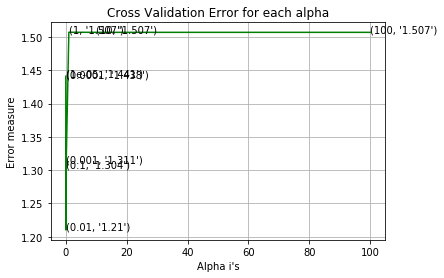

For values of best alpha =  0.01 The train log loss is: 0.7255903531043049
For values of best alpha =  0.01 The cross validation log loss is: 1.2102436359708113
For values of best alpha =  0.01 The test log loss is: 1.0480795778771945


In [93]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used SVM which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.04.
    3. It's better compared to count vectorizer.

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.2102436359708113
Number of mis-classified points : 0.39097744360902253
-------------------- Confusion matrix --------------------


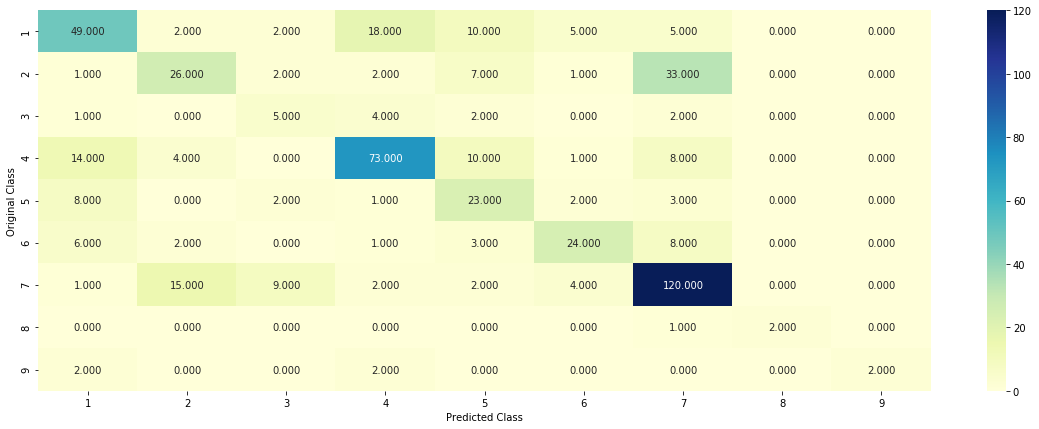

-------------------- Precision matrix (Columm Sum=1) --------------------


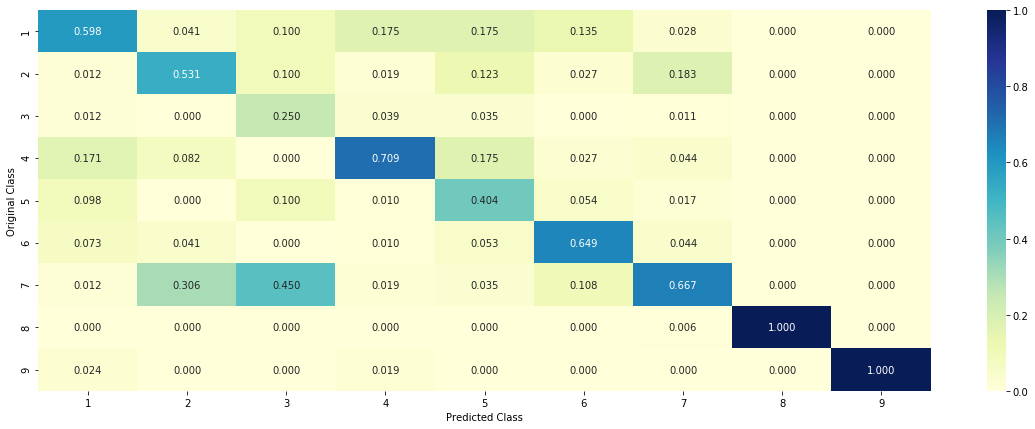

-------------------- Recall matrix (Row sum=1) --------------------


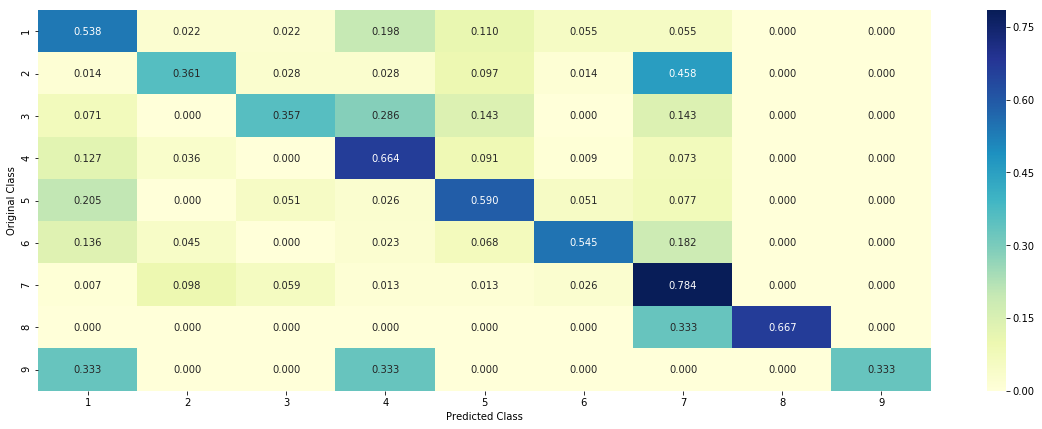

In [94]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding1, train_y,cv_x_onehotCoding1,cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model works well.

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [96]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding1,train_y)
test_point_index = 2
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0204 0.1377 0.0047 0.0516 0.0186 0.0077 0.7541 0.0035 0.0019]]
Actual Class : 7
--------------------------------------------------
18 Text feature [constitutive] present in test data point [True]
22 Text feature [constitutively] present in test data point [True]
24 Text feature [activated] present in test data point [True]
34 Text feature [3t3] present in test data point [True]
36 Text feature [activation] present in test data point [True]
48 Text feature [activate] present in test data point [True]
54 Text feature [expressing] present in test data point [True]
69 Text feature [receptors] present in test data point [True]
70 Text feature [activating] present in test data point [True]
71 Text feature [phospho] present in test data point [True]
83 Text feature [phosphorylation] present in test data point [True]
91 Text feature [downstream] present in test data point [True]
95 Text feature [oncogene] present in test data point [True]


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [104]:
test_point_index = 112
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0642 0.3032 0.017  0.0698 0.0657 0.013  0.4282 0.0308 0.0081]]
Actual Class : 2
--------------------------------------------------
18 Text feature [constitutive] present in test data point [True]
22 Text feature [constitutively] present in test data point [True]
24 Text feature [activated] present in test data point [True]
36 Text feature [activation] present in test data point [True]
40 Text feature [ligand] present in test data point [True]
54 Text feature [expressing] present in test data point [True]
70 Text feature [activating] present in test data point [True]
91 Text feature [downstream] present in test data point [True]
142 Text feature [refractory] present in test data point [True]
149 Text feature [starved] present in test data point [True]
158 Text feature [signaling] present in test data point [True]
159 Text feature [2h] present in test data point [True]
187 Text feature [inhibitor] present in test data point [True]
19

### 4.3.2 With TF-IDF vectorizer using  top 1000 features

#### Hyper parameter Tuning

for C = 1e-05
Log Loss : 1.1529315419962078
for C = 0.0001
Log Loss : 1.0991714331115106
for C = 0.001
Log Loss : 1.1342980819805424
for C = 0.01
Log Loss : 1.441349323040313
for C = 0.1
Log Loss : 1.7486725783425021
for C = 1
Log Loss : 1.8919908676168642
for C = 10
Log Loss : 1.8919906863320965
for C = 100
Log Loss : 1.8919907939946021


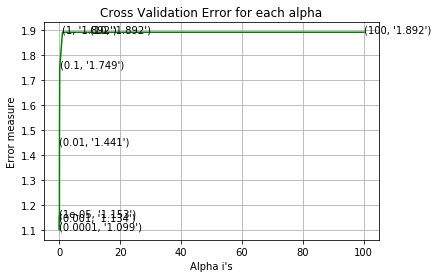

For values of best alpha =  0.0001 The train log loss is: 0.6760876058568094
For values of best alpha =  0.0001 The cross validation log loss is: 1.0991714331115106
For values of best alpha =  0.0001 The test log loss is: 1.0785895673523267


In [128]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Observation
    1. Here We've used SVM which works quite well with TF-IDF vectorizer with top 1000 features.
    2. The log loss is 1.07.
    3. It's better compared to count vectorizer.

#### Testing with Test data

Log loss : 1.0991714331115106
Number of mis-classified points : 0.36466165413533835
-------------------- Confusion matrix --------------------


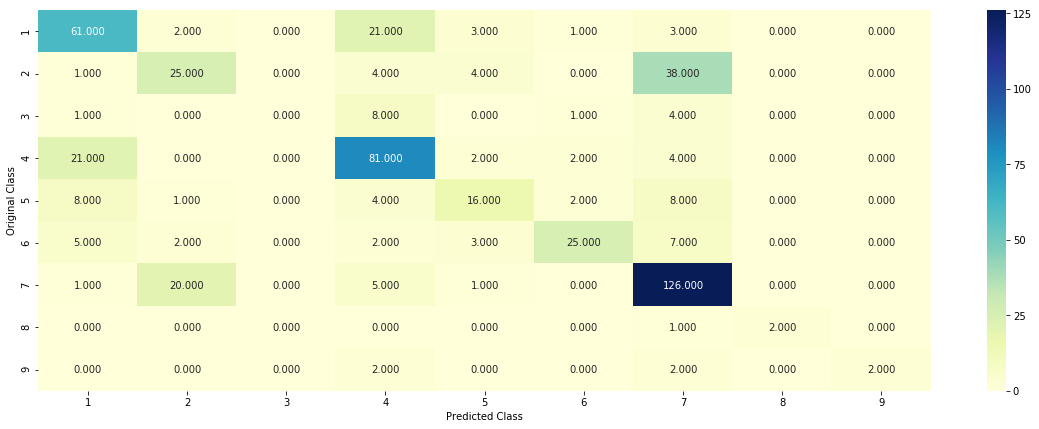

-------------------- Precision matrix (Columm Sum=1) --------------------


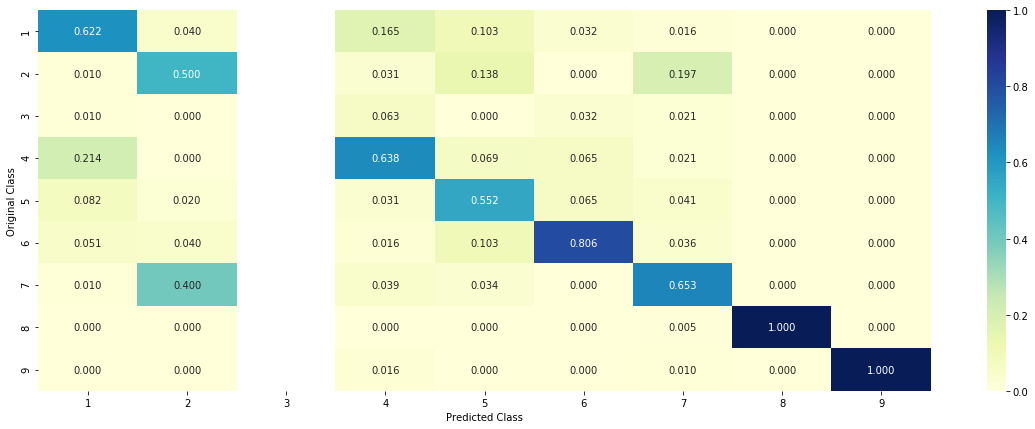

-------------------- Recall matrix (Row sum=1) --------------------


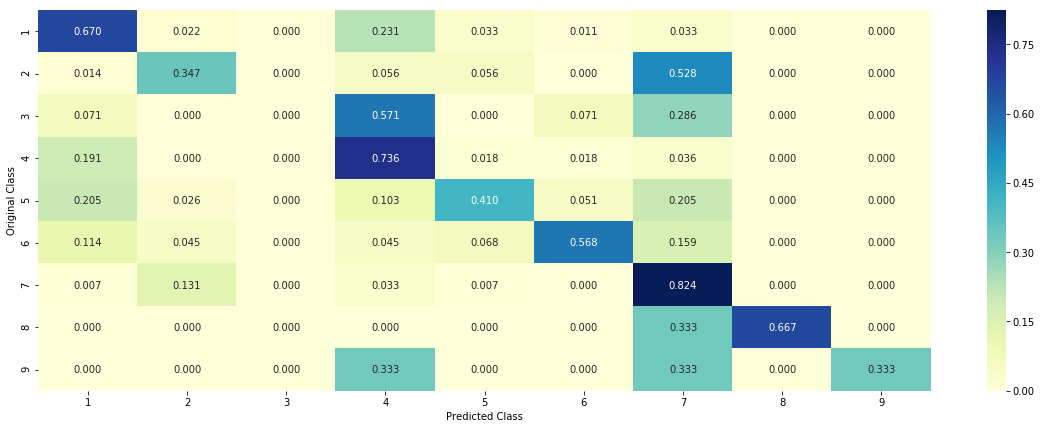

In [129]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding2, train_y,cv_x_onehotCoding2,cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. We find some outliers here
    3. The model seems to work well

#### Feature importance, Correctly classified point

In [130]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding2,train_y)
test_point_index = 2
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0404 0.0455 0.0072 0.0587 0.1227 0.0046 0.718  0.0018 0.001 ]]
Actual Class : 7
--------------------------------------------------
273 Text feature [19] present in test data point [True]
308 Text feature [11] present in test data point [True]
463 Text feature [18] present in test data point [True]
Out of the top  500  features  3 are present in query point


#### Feature importance, Incorrectly classified point

In [131]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding2,train_y)
test_point_index = 100
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1132 0.1298 0.0177 0.0873 0.0508 0.012  0.5822 0.0048 0.0021]]
Actual Class : 2
--------------------------------------------------
273 Text feature [19] present in test data point [True]
463 Text feature [18] present in test data point [True]
Out of the top  500  features  2 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [105]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding1, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding1, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding1)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.244714819332704
for n_estimators = 100 and max depth =  10
Log Loss : 1.2079846687942146
for n_estimators = 200 and max depth =  5
Log Loss : 1.2299291510442487
for n_estimators = 200 and max depth =  10
Log Loss : 1.1929881262349968
for n_estimators = 500 and max depth =  5
Log Loss : 1.2199542895797373
for n_estimators = 500 and max depth =  10
Log Loss : 1.1844259182540866
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2136515881995793
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1823653811170758
for n_estimators = 2000 and max depth =  5
Log Loss : 1.212489729410402
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1790529986100746
For values of best estimator =  2000 The train log loss is: 0.6646024772269897
For values of best estimator =  2000 The cross validation log loss is: 1.1790529986100746
For values of best estimator =  2000 The test log loss is: 1.1308908548929617


### Observation
    1. Here We've used RF which wo doesn't work well with TF-IDF vectorizer on higher dimensional data.
    2. The log loss is 1.13.
    3. It's better compared to count vectorizer.

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1790529986100746
Number of mis-classified points : 0.3966165413533835
-------------------- Confusion matrix --------------------


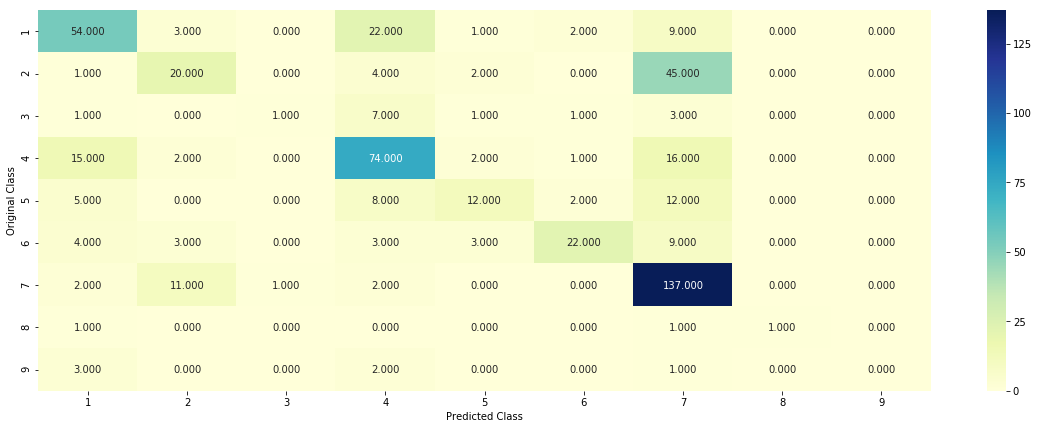

-------------------- Precision matrix (Columm Sum=1) --------------------


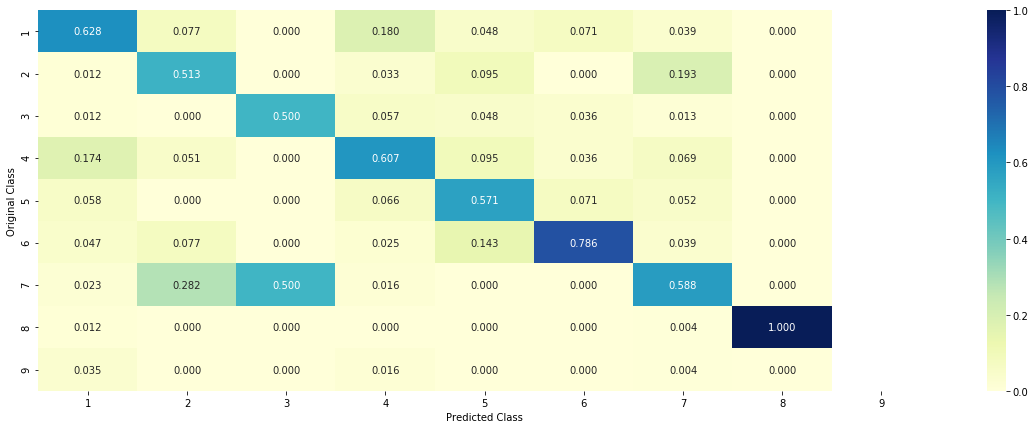

-------------------- Recall matrix (Row sum=1) --------------------


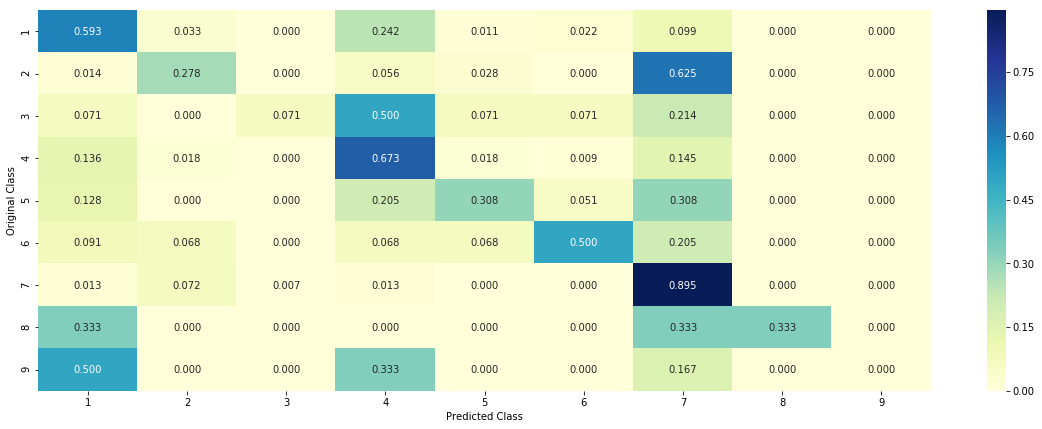

In [106]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding1, train_y,cv_x_onehotCoding1,cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. The model doesn't work well with higher dimensional data.

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Incorrectly Classified point</h4>

In [107]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding1, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4631 0.0138 0.0147 0.2322 0.2164 0.0388 0.0118 0.0046 0.0047]]
Actual Class : 5
--------------------------------------------------
2 Text feature [constitutive] present in test data point [True]
4 Text feature [activation] present in test data point [True]
7 Text feature [phosphorylation] present in test data point [True]
9 Text feature [function] present in test data point [True]
10 Text feature [signaling] present in test data point [True]
15 Text feature [missense] present in test data point [True]
17 Text feature [cells] present in test data point [True]
18 Text feature [variants] present in test data point [True]
22 Text feature [deleterious] present in test data point [True]
24 Text feature [stability] present in test data point [True]
25 Text feature [loss] present in test data point [True]
26 Text feature [pathogenic] present in test data point [True]
27 Text feature [functional] present in test data point [True]
28 Text fe

<h4>4.5.3.2. correctly Classified point</h4>

In [108]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding1[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding1[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0813 0.4581 0.0158 0.0621 0.0399 0.031  0.3003 0.0061 0.0055]]
Actuall Class : 2
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
4 Text feature [activation] present in test data point [True]
5 Text feature [activated] present in test data point [True]
6 Text feature [inhibitors] present in test data point [True]
7 Text feature [phosphorylation] present in test data point [True]
8 Text feature [suppressor] present in test data point [True]
9 Text feature [function] present in test data point [True]
10 Text feature [signaling] present in test data point [True]
11 Text feature [constitutively] present in test data point [True]
12 Text feature [growth] present in test data point [True]
13 Text feature [treatment] present in test data point [True]
14 Text feature [inhibitor] present in test data point [True]
15 Text

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [93]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.2657048897349608
for n_estimators = 10 and max depth =  3
Log Loss : 1.7459205010556096
for n_estimators = 10 and max depth =  5
Log Loss : 1.4368353925512503
for n_estimators = 10 and max depth =  10
Log Loss : 1.904597809032912
for n_estimators = 50 and max depth =  2
Log Loss : 1.7221951095007484
for n_estimators = 50 and max depth =  3
Log Loss : 1.4984825877845531
for n_estimators = 50 and max depth =  5
Log Loss : 1.4593628982873716
for n_estimators = 50 and max depth =  10
Log Loss : 1.8434939703555409
for n_estimators = 100 and max depth =  2
Log Loss : 1.6182209245331227
for n_estimators = 100 and max depth =  3
Log Loss : 1.5199297988828253
for n_estimators = 100 and max depth =  5
Log Loss : 1.4177501184246677
for n_estimators = 100 and max depth =  10
Log Loss : 1.8227504417195126
for n_estimators = 200 and max depth =  2
Log Loss : 1.6622571648074496
for n_estimators = 200 and max depth =  3
Log Loss : 1.480077133914176

### Observation
    1. Here We've used RF which doesn't work quite well with TF-IDF vectorizer.
    2. The log loss is 1.38.
    3. It's better compared to count vectorizer.

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.4177501184246677
Number of mis-classified points : 0.518796992481203
-------------------- Confusion matrix --------------------


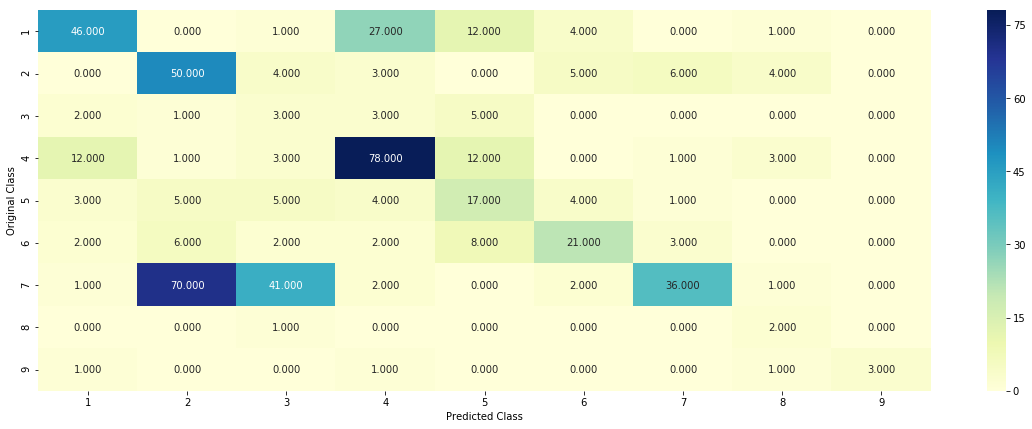

-------------------- Precision matrix (Columm Sum=1) --------------------


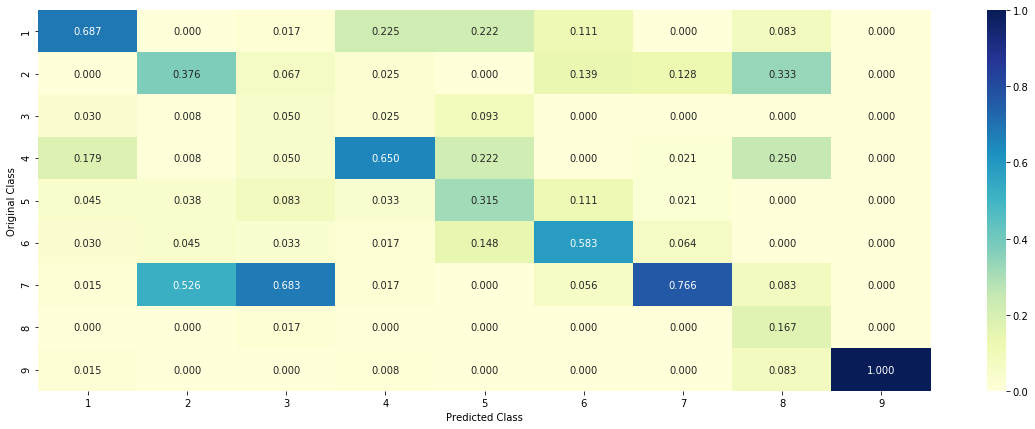

-------------------- Recall matrix (Row sum=1) --------------------


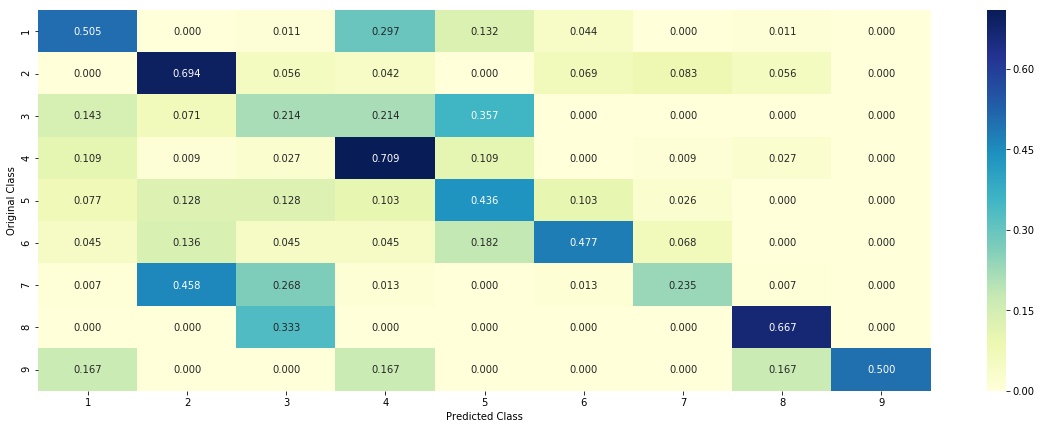

In [94]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. The classification error is 51%
    3. The model performance is not great compared to other models so far.

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [95]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0143 0.5044 0.1471 0.0191 0.0245 0.065  0.1724 0.039  0.0142]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [96]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0281 0.2006 0.203  0.0857 0.0626 0.0906 0.2249 0.0676 0.0369]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


### 4.5.4 With tf-idf using top 1000 features

#### Hyper parameter tuning

In [132]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding2, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding2, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding2)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding2)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding2)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding2)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2731460827333327
for n_estimators = 100 and max depth =  10
Log Loss : 1.2942391415176413
for n_estimators = 200 and max depth =  5
Log Loss : 1.2637876605050669
for n_estimators = 200 and max depth =  10
Log Loss : 1.2823182257575145
for n_estimators = 500 and max depth =  5
Log Loss : 1.2563931703447657
for n_estimators = 500 and max depth =  10
Log Loss : 1.2819363496073857
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2509822200287968
for n_estimators = 1000 and max depth =  10
Log Loss : 1.282164085207135
for n_estimators = 2000 and max depth =  5
Log Loss : 1.249456294954119
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2824309051297365
For values of best estimator =  2000 The train log loss is: 0.8578721439087452
For values of best estimator =  2000 The cross validation log loss is: 1.2494562949541188
For values of best estimator =  2000 The test log loss is: 1.1722328756084408


### Observation
    1. Here We've used RF which works quite well with TF-IDF vectorizer using only top 1000 features.
    2. The log loss is 1.17.
    3. It's better compared to count vectorizer.

#### Testing with Test data

Log loss : 1.2494562949541188
Number of mis-classified points : 0.46616541353383456
-------------------- Confusion matrix --------------------


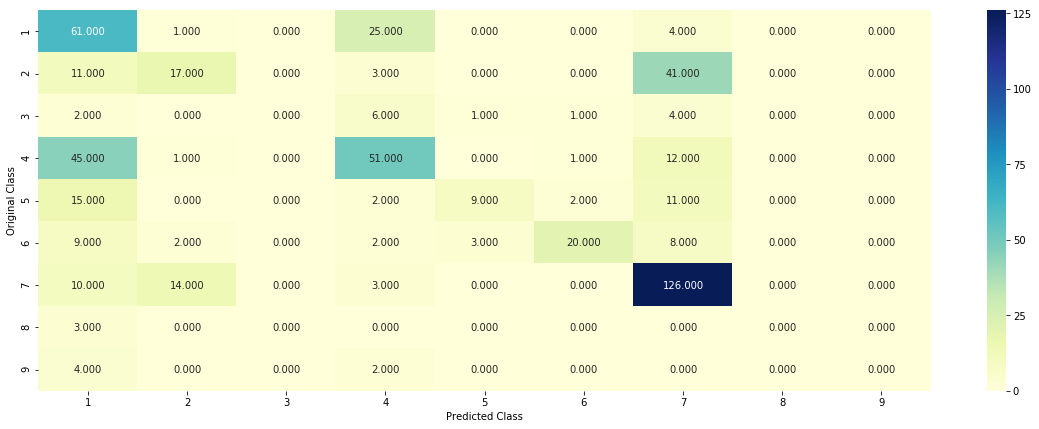

-------------------- Precision matrix (Columm Sum=1) --------------------


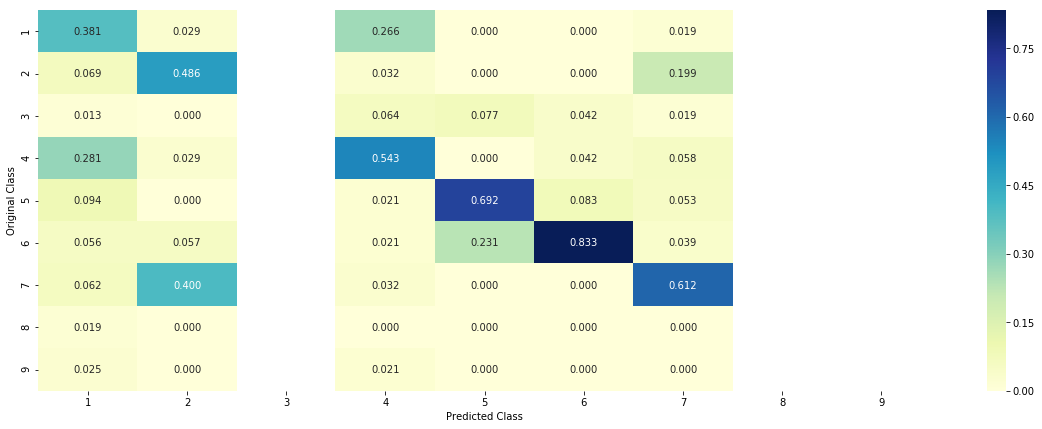

-------------------- Recall matrix (Row sum=1) --------------------


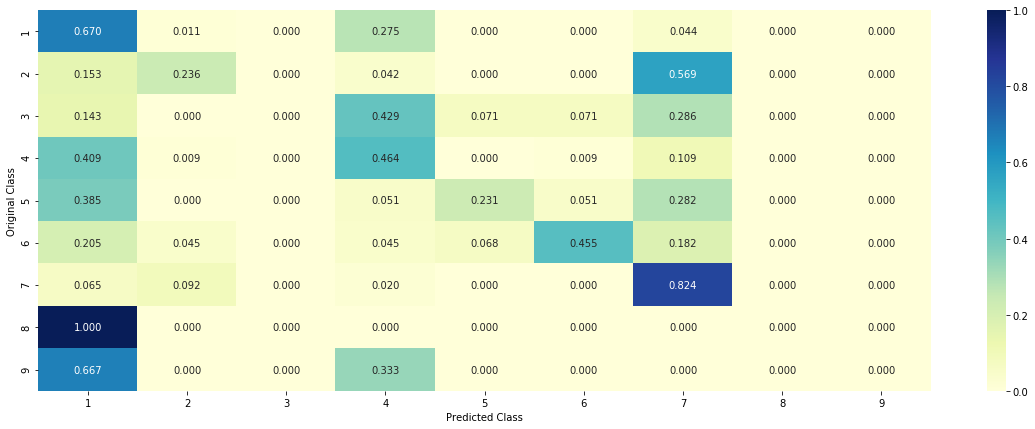

In [133]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding2, train_y,cv_x_onehotCoding2,cv_y, clf)

### Observation
    1. We've plotted confusion,precision and recall matrix.
    2. The classfication rate reduced somewhat
    3. The model performs better than the one usingall the features

#### Feature importance, incorrectly classified point

In [134]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5141 0.0074 0.0103 0.0895 0.2837 0.078  0.0121 0.0023 0.0026]]
Actual Class : 5
--------------------------------------------------
38 Text feature [17] present in test data point [True]
46 Text feature [22] present in test data point [True]
58 Text feature [16] present in test data point [True]
Out of the top  100  features  3 are present in query point


#### Feature importance, correctly classified point

In [139]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding2, train_y)

test_point_index = 114
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding2[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding2[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.1507 0.3795 0.0211 0.0768 0.0636 0.0718 0.2163 0.0116 0.0086]]
Actual Class : 2
--------------------------------------------------
38 Text feature [17] present in test data point [True]
46 Text feature [22] present in test data point [True]
58 Text feature [16] present in test data point [True]
Out of the top  100  features  3 are present in query point


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [109]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding1, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding1, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding1, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding1, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding1))))
sig_clf2.fit(train_x_onehotCoding1, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding1))))
sig_clf3.fit(train_x_onehotCoding1, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding1))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding1, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding1))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding1))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.17
Support vector machines : Log Loss: 1.51
Naive Bayes : Log Loss: 1.30
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.038
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.526
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.175
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.298
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.553


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.6579944300509667
Log loss (CV) on the stacking classifier : 1.1749598714468867
Log loss (test) on the stacking classifier : 1.0493823419328012
Number of missclassified point : 0.3293233082706767
-------------------- Confusion matrix --------------------


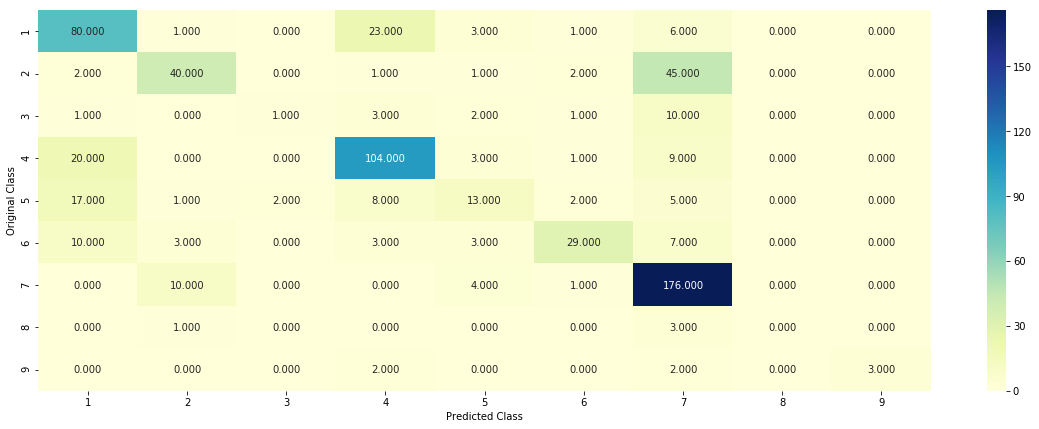

-------------------- Precision matrix (Columm Sum=1) --------------------


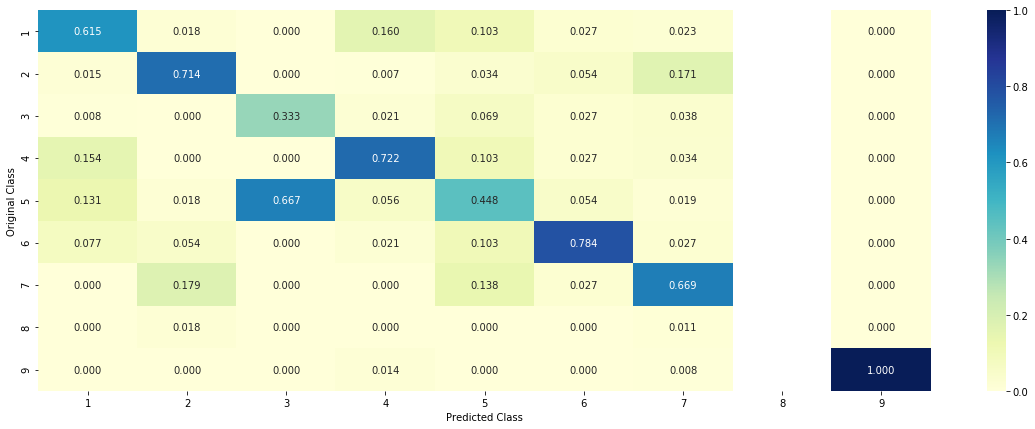

-------------------- Recall matrix (Row sum=1) --------------------


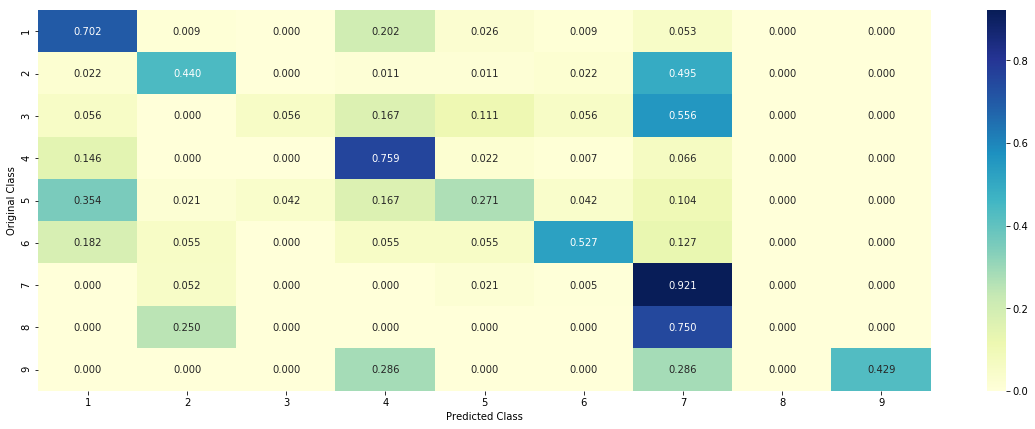

In [110]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding1, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding1))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding1))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding1))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding1)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding1))

### Observation
    1. Here We've used stacking which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.04.
    3. It's better compared to count vectorizer.
    4. We've plotted confusion,precision and recall matrix.
    5. THe classification error is the least so far with 32%
    6. The model works well

### 4.6.3 With TF-IDF Vectorizer using top 1000 features

#### Hyper parameter Tuning

In [140]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding2, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding2, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding2, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding2, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding2))))
sig_clf2.fit(train_x_onehotCoding2, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding2))))
sig_clf3.fit(train_x_onehotCoding2, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding2))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding2, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding2))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding2))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.11
Support vector machines : Log Loss: 1.89
Naive Bayes : Log Loss: 1.25
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.042
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.548
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.213
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.246
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.358


#### Testing with Test data

Log loss (train) on the stacking classifier : 0.8297955404579854
Log loss (CV) on the stacking classifier : 1.2126712508638118
Log loss (test) on the stacking classifier : 1.1100466271865481
Number of missclassified point : 0.35037593984962406
-------------------- Confusion matrix --------------------


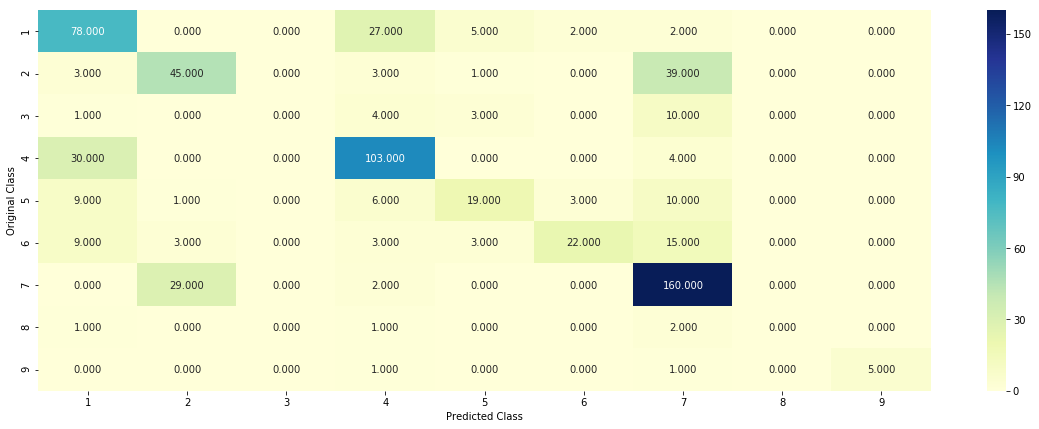

-------------------- Precision matrix (Columm Sum=1) --------------------


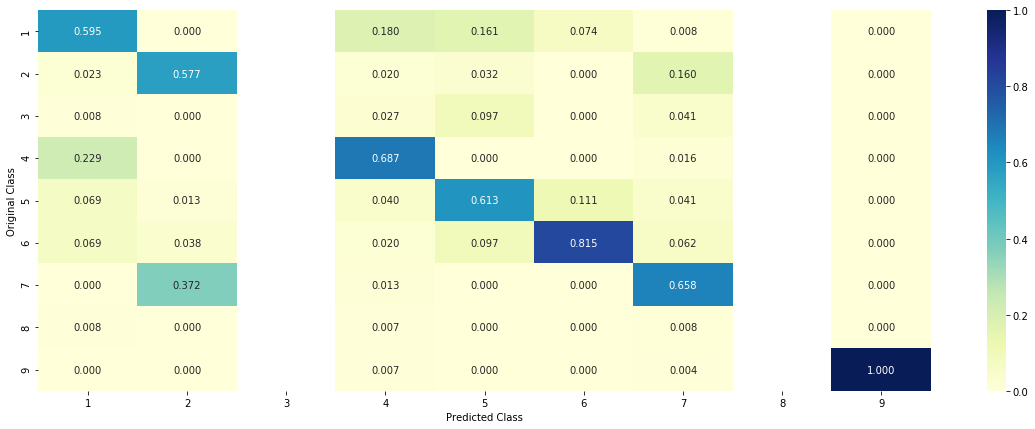

-------------------- Recall matrix (Row sum=1) --------------------


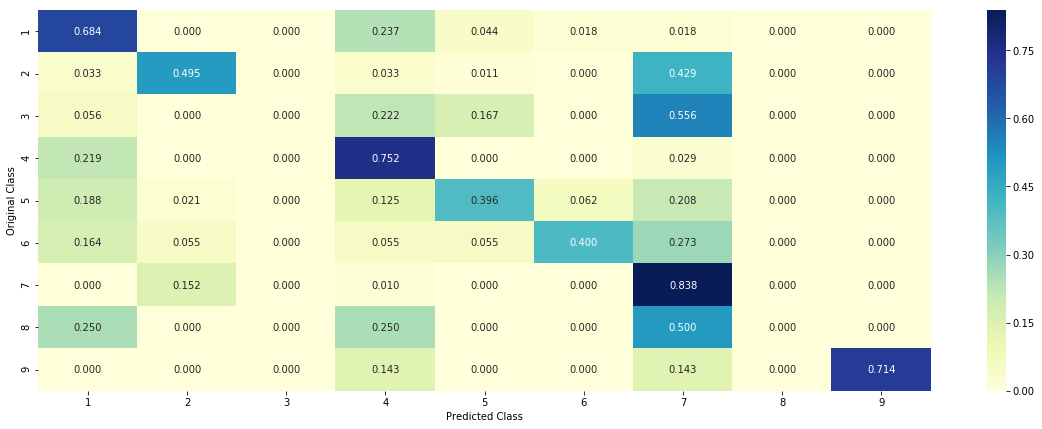

In [141]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding2, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding2))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding2))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding2))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding2)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding2))

### Observation
    1. Here We've used stacking which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.11.
    3. It's better compared to count vectorizer.
    4. We've plotted confusion,precision and recall matrix.
    5. THe classification error is the least so far with 32%
    6. The model works as good as previous model with all features

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8720288924365022
Log loss (CV) on the VotingClassifier : 1.1887739464952773
Log loss (test) on the VotingClassifier : 1.1121365790867743
Number of missclassified point : 0.34135338345864663
-------------------- Confusion matrix --------------------


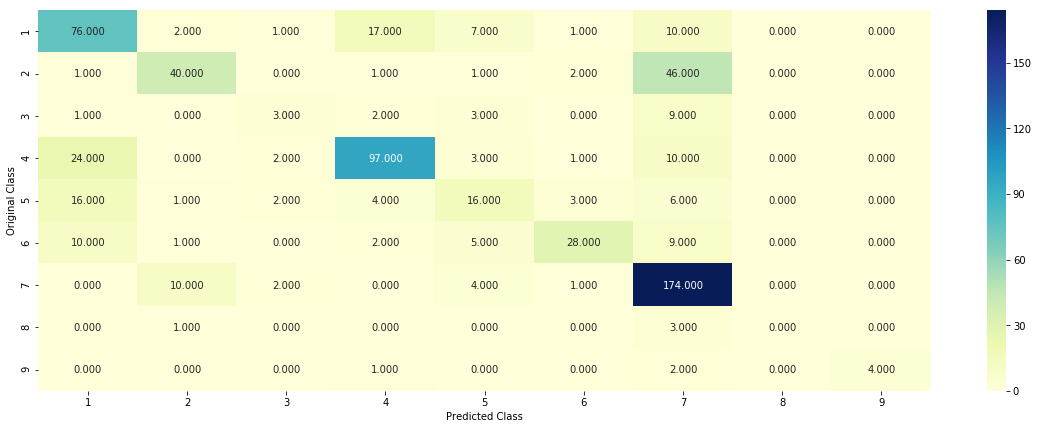

-------------------- Precision matrix (Columm Sum=1) --------------------


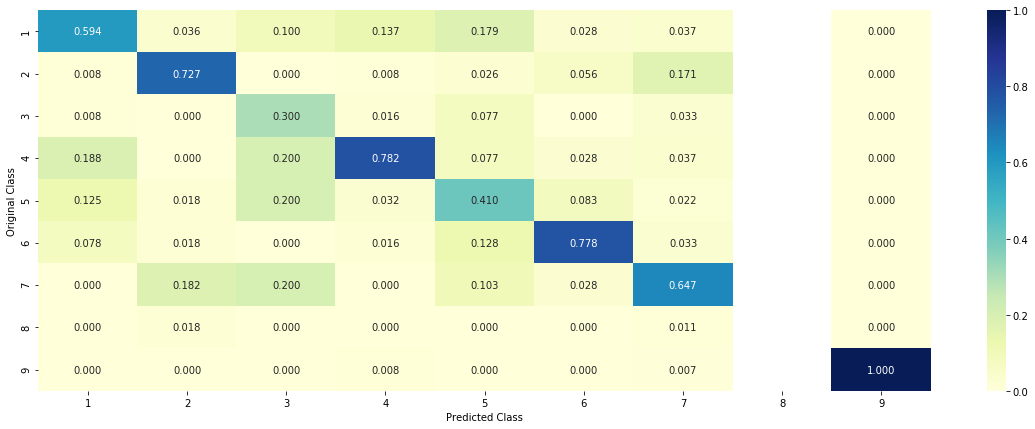

-------------------- Recall matrix (Row sum=1) --------------------


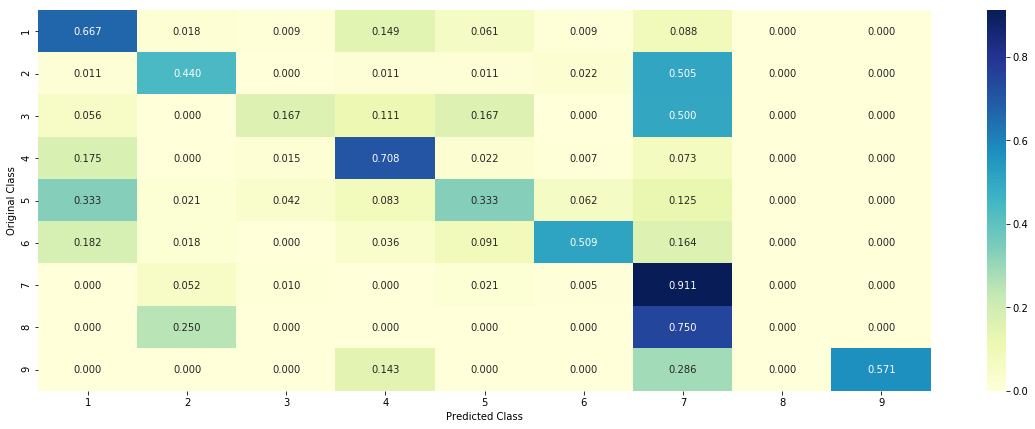

In [111]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding1, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding1)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding1)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding1)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding1)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding1))

### Observation
    1. Here We've used voting classifier which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.04.
    3. It's better compared to count vectorizer.
    4. We've plotted confusion,precision and recall matrix.
    5. THe classification error is 34%
    6. The model works well

### 4.7.4 With Tf-IDF vectorizer using top 1000 features 

Log loss (train) on the VotingClassifier : 0.9650956428329258
Log loss (CV) on the VotingClassifier : 1.253833975441552
Log loss (test) on the VotingClassifier : 1.166186728646643
Number of missclassified point : 0.34285714285714286
-------------------- Confusion matrix --------------------


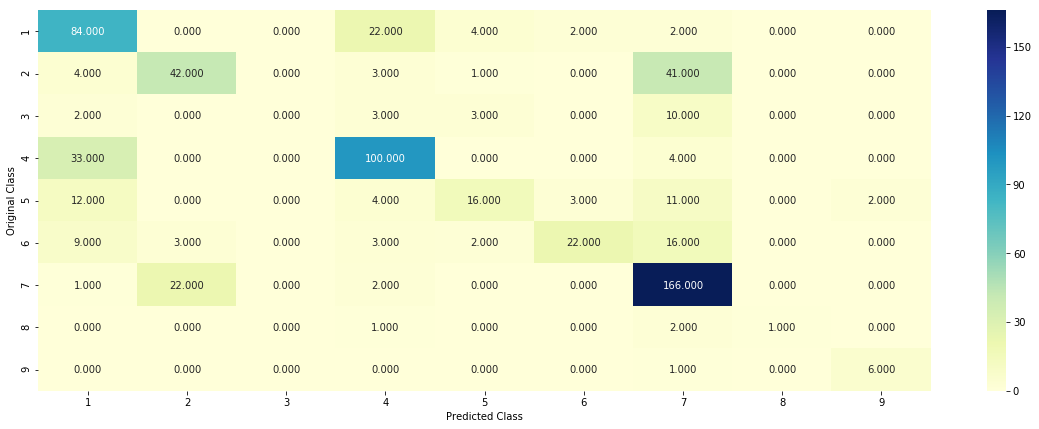

-------------------- Precision matrix (Columm Sum=1) --------------------


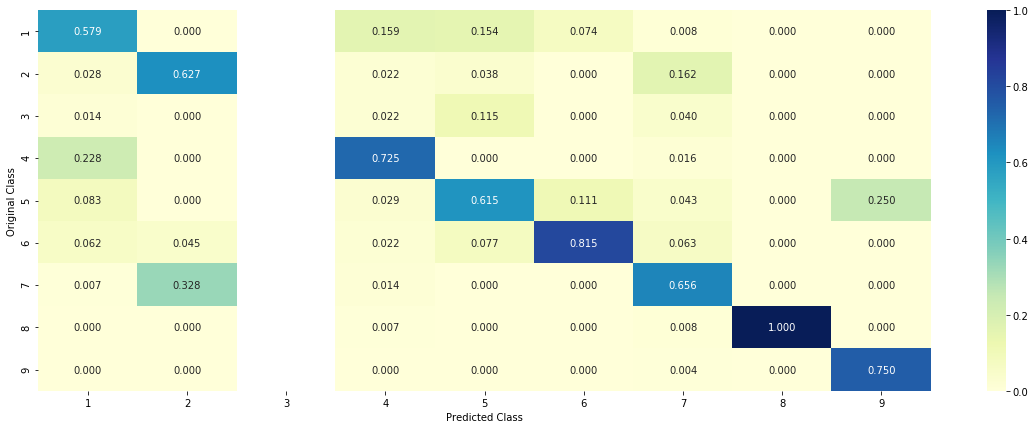

-------------------- Recall matrix (Row sum=1) --------------------


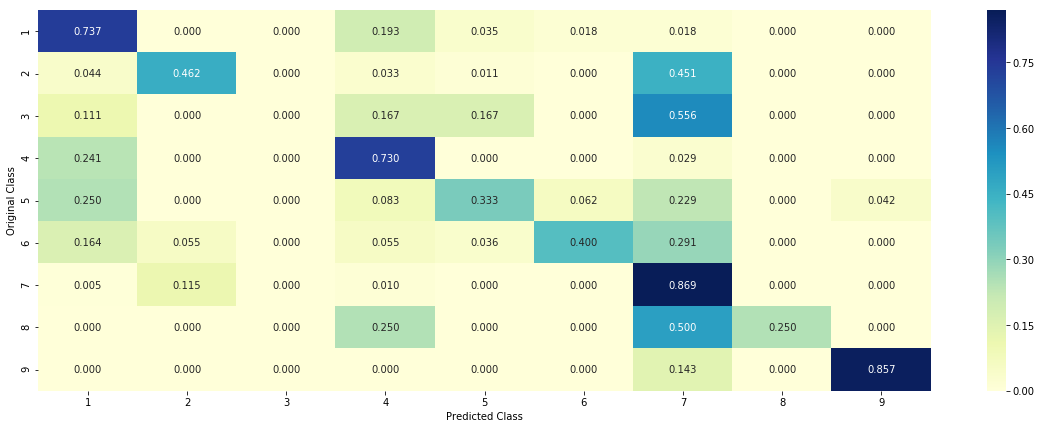

In [142]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding2, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding2)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding2)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding2)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding2)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding2))

### Observation
    1. Here We've used voting classifier which works quite well with TF-IDF vectorizer.
    2. The log loss is 1.16.
    3. It's better compared to count vectorizer.
    4. We've plotted confusion,precision and recall matrix.
    5. THe classification error is 34%
    6. The model works well.

## EDA for classes 3 and 7

#### observation
    1. For some of the models, we find that class 3 and class 7 are correlated or in some cases we find that class 7 
       is wrongly predicted as class 3.
    2. Hence we'll plot the word cloud for these classes.   

#### Word Cloud

In [12]:
def wordcloud(x): ##modified code taken from assignment 10
    from wordcloud import WordCloud, STOPWORDS #https://www.geeksforgeeks.org/generating-word-cloud-python/ 
    import matplotlib.pyplot as plt 
    import pandas as pd
    comment_words = ' '
    comment_words1 = ''
    comment_words2 = ''
    comment_words3 = ''
    comment_words4 = ''
    comment_words5 = ''
    comment_words6 = ''
    comment_words7 = ''
    comment_words8 = ''
    comment_words9 = ''
    comment_words10 = ''
    comment_words11 = ''
    comment_words12= ''
    comment_words12= ''
    comment_words13= ''
    comment_words14= ''
    comment_words15= ''
    comment_words16= ''
    comment_words17= ''
    comment_words18= ''
    comment_words19= ''
    comment_words20= ''
    comment_words21= ''
    comment_words22= ''
    comment_words23= ''
    comment_words24= ''
    comment_words25= ''
    comment_words26= ''
    comment_words27= ''
    comment_words28= ''
    comment_words29= ''
    comment_words30= ''
    comment_words31= ''
    comment_words32= ''
    comment_words33= ''
    comment_words34= ''
    comment_words35= ''
    comment_words36= ''
    comment_words37= ''
    stopwords = set(STOPWORDS)
    count=0
     #iterate through the csv file 
    for val in tqdm(x):
        count= count+1

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens:
            if count<25:
                comment_words = comment_words + words + ' '
            if count>=25 and count<50:
                comment_words1= comment_words1+ words+ ' ' 
            if count>=50 and count<75:
                comment_words2= comment_words2+ words+ ' ' 
            if count>=75 and count<100:
                comment_words3= comment_words3+ words+ ' ' 
            if count>=100 and count<125:
                comment_words4= comment_words4+ words+ ' ' 
            if count>=125 and count<150:
                comment_words5= comment_words5+ words+ ' ' 
            if count>=150 and count<175:
                comment_words6= comment_words6+ words+ ' ' 
            if count>=175 and count<200:
                comment_words7= comment_words7+ words+ ' ' 
            if count>=200 and count<225:
                comment_words8= comment_words8+ words+ ' ' 
            if count>=225 and count<250:
                comment_words9= comment_words9+ words+ ' ' 
            if count>=250 and count<275:
                comment_words10= comment_words10+ words+ ' '
            if count>=275 and count<300:
                comment_words11= comment_words11+ words+ ' '    
            if count>=300 and count<325:
                comment_words12= comment_words12+ words+ ' ' 
            if count>=325 and count<350:
                comment_words13= comment_words13+ words+ ' '
            if count>=350 and count<375:
                comment_words14= comment_words14+ words+ ' '
            if count>=375 and count<400:
                comment_words15= comment_words15+ words+ ' '
            if count>=400 and count<425:
                comment_words16= comment_words16+ words+ ' '
            if count>=425 and count<450:
                comment_words17= comment_words17+ words+ ' '
            if count>=450 and count<475:
                comment_words18= comment_words18+ words+ ' '
            if count>=475 and count<500:
                comment_words19= comment_words19+ words+ ' '
            if count>=500 and count<525:
                comment_words20= comment_words20+ words+ ' '
            if count>=525 and count<550:
                comment_words21= comment_words21+ words+ ' '
            if count>=550 and count<575:
                comment_words22= comment_words22+ words+ ' '
            if count>=575 and count<600:
                comment_words23= comment_words23+ words+ ' '
            if count>=600 and count<625:
                comment_words24= comment_words24+ words+ ' '
            if count>=625 and count<650:
                comment_words25= comment_words25+ words+ ' '
            if count>=650 and count<675:
                comment_words26= comment_words26+ words+ ' '
            if count>=675 and count<700:
                comment_words27= comment_words27+ words+ ' '
            if count>=700 and count<725:
                comment_words28= comment_words28+ words+ ' '
            if count>=725 and count<750:
                comment_words29= comment_words29+ words+ ' '
            if count>=750 and count<775:
                comment_words30= comment_words30+ words+ ' '
            if count>=775 and count<800:
                comment_words31= comment_words31+ words+ ' '
            if count>=800 and count<825:
                comment_words32= comment_words32+ words+ ' '
            if count>=825 and count<850:
                comment_words33= comment_words33+ words+ ' '
            if count>=850 and count<875:
                comment_words34= comment_words34+ words+ ' '
            if count>=875 and count<900:
                comment_words35= comment_words35+ words+ ' '
            if count>=900 and count<925:
                comment_words36= comment_words36+ words+ ' '
            if count>=925 and count<=953:
                comment_words37= comment_words37+ words+ ' '
                
                
                

                
    comment_words= comment_words+comment_words1+comment_words2+comment_words3+comment_words4+comment_words5+comment_words6+comment_words7+comment_words8+comment_words9+comment_words10+comment_words11+comment_words12+comment_words13+comment_words14+comment_words15+comment_words16+comment_words17+comment_words18+comment_words19+comment_words20+comment_words21+comment_words22+comment_words23+comment_words24+comment_words25+comment_words26+comment_words27+comment_words28+comment_words29+comment_words30+comment_words31+comment_words32+comment_words33+comment_words34+comment_words35+comment_words36+comment_words37
   
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,  
                min_font_size = 10,
                relative_scaling=0.5).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:17<00:00,  3.87it/s]


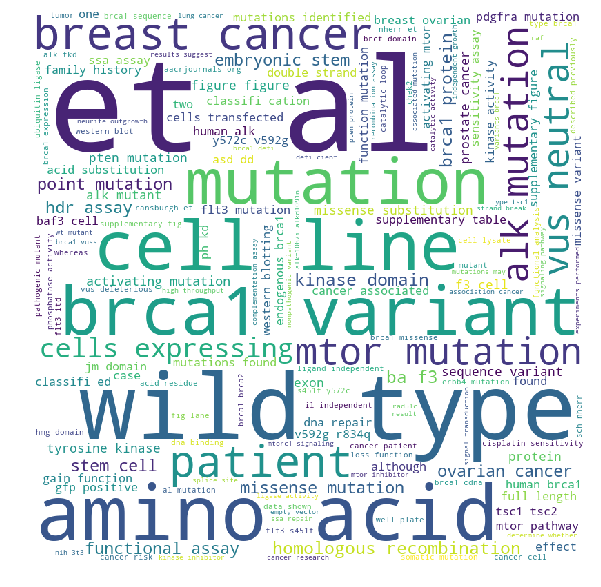

100%|██████████████████████████████████████████████████████████████████████████████| 953/953 [1:17:20<00:00,  1.72it/s]


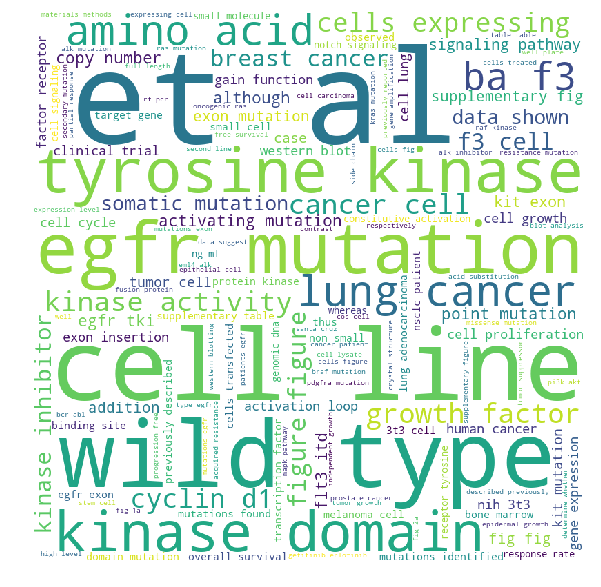

In [13]:
#approvedw_count1 = result[result['Class']==1]['TEXT'].str.split().apply(len)
#approvedw_count1 = approvedw_count1.values

#approvedw_count2 = result[result['Class']==2]['TEXT'].str.split().apply(len)
#approvedw_count2 = approvedw_count2.values

approvedw_count3 = result[result['Class']==3]['TEXT']
wordcloud(approvedw_count3)

#approvedw_count4 = result[result['Class']==4]['TEXT'].str.split().apply(len)
#approvedw_count4 = approvedw_count4.values

#approvedw_count5 = result[result['Class']==5]['TEXT'].str.split().apply(len)
#approvedw_count5 = approvedw_count5.values

#approvedw_count6 = result[result['Class']==6]['TEXT'].str.split().apply(len)
#approvedw_count6 = approvedw_count6.values

approvedw_count7 = result[result['Class']==7]['TEXT']
wordcloud(approvedw_count7)

#approvedw_count8 = result[result['Class']==8]['TEXT'].str.split().apply(len)
#approvedw_count8 = approvedw_count8.values

#approvedw_count9 = result[result['Class']==9]['TEXT'].str.split().apply(len)
#approvedw_count9 = approvedw_count9.values

### Observations
    1. We've plotted the word cloud for classes 3 and 7.
    2. There are words like et,al,mutation and breast cancer which are significant and found in both classes.
    3. Hence the model may be incorrectl predicting one for another in some cases

# Feature engineering

#### Method of approach
    1. We've taken the text features into consideration and modified them using uni,bi,tri and quad grams.
    2. The top 2000 features are considered using max features.
    3. The gene and variation feature are considered and only top 100 features from each are considered.
    4. For this, we are using logistic regression model.

for alpha = 1e-06
Log Loss : 1.1673158399311123
for alpha = 1e-05
Log Loss : 1.1251183792053658
for alpha = 0.0001
Log Loss : 0.9753726232543096
for alpha = 0.001
Log Loss : 1.0070182749859016
for alpha = 0.01
Log Loss : 1.1759941314785414
for alpha = 0.1
Log Loss : 1.6918172767998805
for alpha = 1
Log Loss : 1.8134038269050092
for alpha = 10
Log Loss : 1.8244236086960963
for alpha = 100
Log Loss : 1.8256702677820749


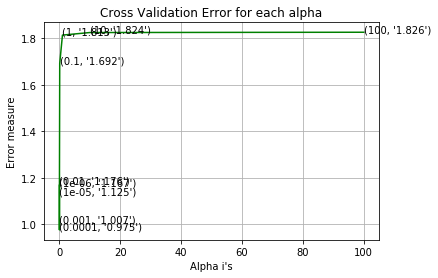

For values of best alpha =  0.0001 The train log loss is: 0.6811485398501285
For values of best alpha =  0.0001 The cross validation log loss is: 0.9718023974589051
For values of best alpha =  0.0001 The test log loss is: 0.9969543400392816


In [79]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log')
    clf.fit(train_x_onehotCoding4, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding4, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding4)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log')
clf.fit(train_x_onehotCoding4, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding4, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding4)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding4)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding4)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Observation
    1. The cv log loss reduced to less than 1 and is 0.97.
    2. The test log loss is the least 0.99

## Summary

In [77]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Model","Encoding of cateogories","Vectorizer","Hyper parameter", "test logloss","misclassification"]

x.add_row(["Naive Bayes","One hot","TF-IDF",0.001,1.20,0.39])
x.add_row(["Naive Bayes","One hot","TF-IDF(1000*)",0.001,1.15,0.40])
x.add_row(["KNN","Response","None",5,0.97,0.38])
x.add_row(["Logistic Regression(CB)","One hot","TF-IDF",0.001,1.03,0.37])
x.add_row(["Logistic Regression","One hot","TF-IDF",0.001,1.04,0.39])
x.add_row(["Logistic Regression(CB)","One hot","Count(uni,bi)",0.01,1.08,0.38])
x.add_row(["Logistic Regression(CB)","One hot","TF-IDF(*1000)",0.0001,1.01,0.36])
x.add_row(["SVM","One hot","TF-IDF",0.01,1.04,0.39])
x.add_row(["SVM","One hot","TF-IDF",0.0001,1.01,0.36])
x.add_row(["Random Forest","One hot","TF-IDF","2000,10",1.13,0.36])
x.add_row(["Random Forest","Response","None","100,10",1.38,0.51])
x.add_row(["Random Forest","One hot","TF-IDF(*1000)","2000,10",1.17,0.46])
x.add_row(["Stacking","one hot","TF-IDF",1,1.04,0.32])
x.add_row(["Stacking","one hot","TF-IDF(*1000)",0.1,1.11,0.35])
x.add_row(["Voting","one hot","TF-IDF",1,1.06,0.32])
x.add_row(["Voting","one hot","TF-IDF(*1000)",0.1,1.16,0.34])




print(x)
print("* top features")
print("CB= Class Balanced")

+-------------------------+-------------------------+---------------+-----------------+--------------+-------------------+
|          Model          | Encoding of cateogories |   Vectorizer  | Hyper parameter | test logloss | misclassification |
+-------------------------+-------------------------+---------------+-----------------+--------------+-------------------+
|       Naive Bayes       |         One hot         |     TF-IDF    |      0.001      |     1.2      |        0.39       |
|       Naive Bayes       |         One hot         | TF-IDF(1000*) |      0.001      |     1.15     |        0.4        |
|           KNN           |         Response        |      None     |        5        |     0.97     |        0.38       |
| Logistic Regression(CB) |         One hot         |     TF-IDF    |      0.001      |     1.03     |        0.37       |
|   Logistic Regression   |         One hot         |     TF-IDF    |      0.001      |     1.04     |        0.39       |
| Logistic Regre

### Conclusion
    1. We've solved the case study of personalised cancer diagnosis.
    2. We've improved our model using TF-IDF features which improvised our log loss comapred to count vectorizer.
    3. The best model obatined using all the methods is logistic regression with class balancing.
    4. Log loss is least with knn using response coding
    5. The random forest model works better with top 1000 features of TF-IDF vectorizer.
    6. For feature engineering,we've considered using TF-IDF with all top 2000 features using uni,bi,tri and quad gram,
       Our test log loss is 0.99 which is the best overall model.
    7. The stacking classifier significantly reduces classification error. 
    8. We've used one hot encoding in majority of our classifiers
    9. In certain cases TF-IDF with top features works better than TF-IDF with all features.
    10. Hence the logistic regression model can be deployed in real world scenario